###  **СОДЕРЖАНИЕ**

1. ПРЕДПОДГОТОВКА ДАННЫХ, ПРЕДВАРИТЕЛЬНЫЙ АНАЛИЗ\
    1.1. Тестовая группа\
    1.2. Контрольные группы   
    1.3. Некоторые уточнения согласно условиям эксперимента
2. ПРОВЕРКА УСПЕШНОСТИ ЭКСПЕРИМЕНТА
3. ИМЕЕТ ЛИ НОВОВВЕДЕНИЕ СМЫСЛ СРЕДИ КАКИХ-ЛИБО КОНКРЕТНЫХ ГРУПП ПОЛЬЗОВАТЕЛЕЙ?\
    3.1. Пилотажный анализ проблемы\
    3.2. Основной блок аналитики
    
        3.2.1. Фактор "age" (возраст пользователей)
        3.2.2. Фактор "country" (страна пользователя)
        3.2.3. Фактор "views_count" (число полученных оценок)
        3.2.4. Фактор "attraction_coeff" (коэффициент привлекательности)
        3.2.5. Фактор "frequency" (частота посещений сайта)
        
4. ОБЩИЕ ВЫВОДЫ ПО ПРОЕКТУ

### **CONTENT**
1. EXPLORATORY DATA ANALYSIS\
    1.1. Test group\
    1.2. Control groups\
    1.3. Some clarifications according to the conditions of the experiment

2. CHECKING THE SUCCESS OF THE EXPERIMENT

3. DOES THE INNOVATION MAKE MEANING AMONG ANY PARTICULAR USER GROUPS?\
    3.1. Pilot analysis of the problem\
    3.2. The main block of analytics

          3.2.1. Factor "age" (age of users)
          3.2.2. Factor "country" (user's country)
          3.2.3. Factor "views_count" (number of views received)
          3.2.4. Factor "attraction_coeff" (attractiveness coefficient)
          3.2.5. Factor "frequency" (frequency of site visits)
                                   
4. GENERAL CONCLUSIONS ON THE PROJECT

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, mannwhitneyu
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from tqdm.auto import tqdm

from scipy import stats

plt.style.use('ggplot')

import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from scipy.stats import kruskal
import scikit_posthocs as sp

In [2]:
sns.set(rc={'figure.figsize': (16,6)}, style='whitegrid') 

In [3]:

#          Согласно предоставленной информации, в эксперименте приняло участие три группы: тестовая (test),
#   контрольная 1 (control_1) и контрольная 2 (control_2). Судя по всему, имеем дело с классическим вариантом A/A/B теста.
#          Дополнительная контрольная А-ветка является страховкой (например, если в компании кто-то параллельно проводит 
#   эксперимент с той же целевой метрикой или чтобы убедиться в качестве сплитования). Встречается точка зрения,
#   что A/A/B тест - это компромиссный лайт-вариант процесса последовательного проведения A/A теста, а затем A/B - теста.
#          В  A/A/B тестах мы хотим принимать гипотезу H(0) в паре A1/A2 и отвергать H(0) на этапе A1+A2/B.


   
   Согласно предоставленной информации, в эксперименте приняло участие три группы: тестовая (test), контрольная 1 (control_1) и  контрольная 2 (control_2). Судя по всему, имеем дело с классическим вариантом A/A/B теста.\
   Дополнительная контрольная А-ветка является страховкой (например, если в компании кто-то параллельно проводит эксперимент с той же целевой метрикой или чтобы убедиться в качестве сплитования). Встречается точка зрения, что A/A/B тест - это компромиссный лайт-вариант процесса последовательного проведения A/A теста, а затем A/B - теста.\
   В A/A/B тестах мы хотим принимать гипотезу H(0) в паре A1/A2 и отвергать H(0) на этапе A1+A2/B.
    


According to the information provided, three groups took part in the experiment: test (test), control 1 (control_1) and control 2 (control_2). Apparently, we are dealing with the classic version of the A/A/B test.\
An additional control A-branch is insurance (for example, if someone in the company runs an experiment in parallel with the same target metric or to verify the quality of the split). There is a point of view that an A/A/B test is a compromise light version of the process of sequentially conducting an A/A test, and then an A/B test.  
In A/A/B tests, we want to accept hypothesis H(0) in pair A1/A2 and reject H(0) at stage A1+A2/B.


In [4]:

#   Предполагаемые:
#         Цель эксперимента: повысить выручку за счет изменения для новых пользователей из нескольких стран стоимости
#                            премиум-подписки при покупке через две новые платежные системы.  
#         Метрики: Retention, ARPPU, Active Users.
#         Гипотеза: ожидаем, что за счет изменения стоимости премиум-подписки будут получены достоверно значимые различия 
#                   по выручке между группами A1+A2/B.


Предполагаемые:  
* Цель эксперимента: повысить выручку за счет изменения для новых пользователей из нескольких стран стоимости  премиум-подписки при покупке через две новые платежные системы.  
* Метрики: Retention, ARPPU, Active Users.
* Гипотеза: ожидаем, что за счет изменения стоимости премиум-подписки будут получены достоверно значимые различия  по выручке между группами A1+A2/B.

Estimated:
* The purpose of the experiment: to increase revenue by changing the cost of a premium subscription for new users from several countries when buying through two new payment systems.
* Metrics: Retention, ARPPU, Active Users.
* Hypothesis: we expect that due to the change in the cost of the premium subscription, significantly significant differences in revenue between groups A1+A2/B will be obtained.

####                                     1. ПРЕДПОДГОТОВКА ДАННЫХ, ПРЕДВАРИТЕЛЬНЫЙ АНАЛИЗ

####                                                                        1.  EXPLORATORY  DATA  ANALYSIS

In [5]:
users_test = pd.read_csv('https://stepik.org/media/attachments/lesson/409320/users_test.csv', encoding='Windows-1251', sep=';')

In [6]:
transactions_test = pd.read_csv('https://stepik.org/media/attachments/lesson/409320/transactions_test.csv', encoding='Windows-1251', sep=';', parse_dates=['joined_at', 'paid_at'])

In [7]:
users_control_1 = pd.read_csv('https://stepik.org/media/attachments/lesson/409320/users_control_1.csv', encoding='Windows-1251', sep=';')

In [8]:
transactions_control_1 = pd.read_csv('https://stepik.org/media/attachments/lesson/409320/transactions_control_1.csv', encoding='Windows-1251', sep=';', parse_dates=['joined_at', 'paid_at'])

In [9]:
users_control_2 = pd.read_csv('https://stepik.org/media/attachments/lesson/409320/users_control_2.csv', encoding='Windows-1251', sep=';')

In [10]:
transactions_control_2 = pd.read_csv('https://stepik.org/media/attachments/lesson/409320/transactions_control_2.csv', encoding='Windows-1251', sep=';', parse_dates=['joined_at', 'paid_at'])

In [11]:
#                                           1.1. Тестовая группа

####                                         1.1. Тестовая группа

####                                          1.1. Test group

In [12]:
users_test.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0
1,892044516,27,0,NaN,Germany,NaN,1,24,30,0,NaN,NaN,0
2,892185708,45,44,NaN,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,NaN,NaN,0
3,892130292,32,0,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,NaN,NaN,0
4,891406035,27,1000,NaN,France,NaN,1,24,30,1,1.0,NaN,0


In [13]:
users_test.shape

(4308, 13)

In [14]:
users_test.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
dtype: object

In [15]:
users_test.describe()

,uid,age,attraction_coeff,coins,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
count,4.308000e+03,4308.000000,4308.000000,49.000000,4308.000000,4308.000000,4308.000000,4308.000000,408.0,157.0,4308.000000
mean,8.917437e+08,31.889276,316.411328,229.836735,0.953110,26.701486,38.248839,50.391133,1.0,1.0,534.080316
std,4.547670e+05,10.245287,323.373725,1205.819471,0.211427,9.390851,15.344562,318.676437,0.0,0.0,4371.682632
min,8.910511e+08,16.000000,0.000000,1.000000,0.000000,13.000000,19.000000,0.000000,1.0,1.0,0.000000
25%,8.913621e+08,25.000000,0.000000,4.000000,1.000000,19.000000,28.000000,1.000000,1.0,1.0,0.000000
50%,8.917290e+08,30.000000,250.000000,9.000000,1.000000,24.000000,35.000000,6.000000,1.0,1.0,0.000000
75%,8.920952e+08,38.000000,520.250000,72.000000,1.000000,32.000000,44.000000,22.000000,1.0,1.0,0.000000
max,9.051586e+08,99.000000,1000.000000,8466.000000,1.000000,96.000000,102.000000,12831.000000,1.0,1.0,129870.000000


In [16]:
users_test.isnull().sum()

uid                    0
age                    0
attraction_coeff       0
coins               4259
country                0
visit_days          1330
gender                 0
age_filter_start       0
age_filter_end         0
views_count            0
was_premium         3900
is_premium          4151
total_revenue          0
dtype: int64

In [17]:
users_test.uid.nunique()  # все пользователи уникальны  # all users are unique

4308

In [18]:
users_test.country.nunique()  # из какого количества стран  # from how many countries

51

In [19]:
users_test.query('total_revenue == 0').shape[0]  # из 4308 платежей 4162 равны 0.  # out of 4308 payments 4162 are 0.  

4162

>

In [20]:
transactions_test.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891345942,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909,147,trial_vip_popup,trial_premium
1,892054251,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923,147,trial_vip_popup,trial_premium
2,892236423,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type
3,892236423,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type
4,892168170,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087,147,trial_vip_popup,trial_premium


In [21]:
transactions_test.shape

(273, 8)

In [22]:
transactions_test.dtypes

uid                      int64
country                 object
joined_at       datetime64[ns]
paid_at         datetime64[ns]
revenue                  int64
payment_id               int64
from_page               object
product_type            object
dtype: object

In [23]:
transactions_test.describe()

,uid,revenue,payment_id
count,2.730000e+02,273.000000,273.000000
mean,8.918375e+08,8589.380952,98.227106
std,3.777452e+05,11127.479971,57.762760
min,8.910712e+08,533.000000,0.000000
25%,8.915082e+08,2743.000000,19.000000
50%,8.919143e+08,6305.000000,146.000000
75%,8.921442e+08,12597.000000,147.000000
max,8.924386e+08,113477.000000,147.000000


In [24]:
transactions_test.isnull().sum()

uid             0
country         0
joined_at       0
paid_at         0
revenue         0
payment_id      0
from_page       0
product_type    0
dtype: int64

In [25]:
transactions_test.uid.nunique()  # не все пользователи уникальны  # not all users are unique

146

In [26]:
transactions_test.uid.value_counts()     

892236423    14
892065108     9
892339626     9
892057347     9
891861594     6
             ..
891307014     1
891861489     1
891907887     1
891234657     1
891499359     1
Name: uid, Length: 146, dtype: int64

In [27]:
transactions_test.revenue.nunique() 

125

In [28]:
transactions_test.describe(include='object')

,country,from_page,product_type
count,273,273,273
unique,17,22,4
top,United States of America,empty_likes,coins
freq,94,72,106


In [29]:
transactions_test.describe(include='datetime')

C:\Users\user\AppData\Local\Temp\ipykernel_8976\322469275.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transactions_test.describe(include='datetime')
C:\Users\user\AppData\Local\Temp\ipykernel_8976\322469275.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transactions_test.describe(include='datetime')


,joined_at,paid_at
count,273,273
unique,146,258
top,2017-10-18 01:09:00,2017-10-22 22:08:00
freq,14,4
first,2017-01-11 03:07:00,2017-01-11 04:37:00
last,2017-10-31 23:40:00,2017-12-11 22:06:00


In [30]:
transactions_test.product_type.unique()  

array(['trial_premium', 'other_type', 'premium_no_trial', 'coins'],
      dtype=object)

In [31]:
transactions_test.groupby('product_type').agg({'revenue': 'sum'})

,revenue
product_type,
coins,566176
other_type,167817
premium_no_trial,810706
trial_premium,800202


In [32]:
 transactions_test.groupby('product_type').agg({'uid': 'count'})

,uid
product_type,
coins,106
other_type,29
premium_no_trial,76
trial_premium,62


In [33]:
transactions_test.query('product_type == "premium_no_trial"').groupby('uid', as_index=False).agg({'revenue': 'count'})

,uid,revenue
0,891071157,1
1,891152790,1
2,891178380,1
3,891222282,1
4,891291531,1
...,...,...
62,892370097,1
63,892390170,1
64,892405179,1
65,892426491,1


In [34]:
transactions_test.query('product_type == "premium_no_trial"').groupby('uid', as_index=False).agg({'revenue': 'sum'})

,uid,revenue
0,891071157,9100
1,891152790,12597
2,891178380,113477
3,891222282,6292
4,891291531,4056
...,...,...
62,892370097,11115
63,892390170,5369
64,892405179,9100
65,892426491,12597


In [35]:
# Объединяем данные  # Combining data

group_b_full = users_test.merge(transactions_test, how='right', on='uid')
group_b_full.head()

,uid,age,attraction_coeff,coins,country_x,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,country_y,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891345942,52,209,NaN,Italy,"1,2,3,4,5,6,8,10",1,49,55,43,1.0,1.0,12909,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909,147,trial_vip_popup,trial_premium
1,892054251,37,390,NaN,United States of America,"1,2,3,4,6,7",1,34,40,64,1.0,1.0,13923,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923,147,trial_vip_popup,trial_premium
2,892236423,23,262,378.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,19,23,1326,1.0,1.0,95823,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,menu,other_type
3,892236423,23,262,378.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,19,23,1326,1.0,1.0,95823,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,menu,other_type
4,892168170,29,406,4.0,United States of America,"1,2,4,5,6,7,8,9,10,13,15,16,17,18,19,20,22,23,...",1,26,32,86,1.0,1.0,15392,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087,147,trial_vip_popup,trial_premium


In [36]:
group_b_full.shape

(273, 20)

In [37]:
group_b_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   uid               273 non-null    int64         
 1   age               273 non-null    int64         
 2   attraction_coeff  273 non-null    int64         
 3   coins             150 non-null    float64       
 4   country_x         273 non-null    object        
 5   visit_days        253 non-null    object        
 6   gender            273 non-null    int64         
 7   age_filter_start  273 non-null    int64         
 8   age_filter_end    273 non-null    int64         
 9   views_count       273 non-null    int64         
 10  was_premium       265 non-null    float64       
 11  is_premium        240 non-null    float64       
 12  total_revenue     273 non-null    int64         
 13  country_y         273 non-null    object        
 14  joined_at         273 non-

In [38]:
product_type_vs_profit_b = group_b_full.groupby('product_type', as_index=False).total_revenue.sum()
product_type_vs_profit_b

,product_type,total_revenue
0,coins,2986477
1,other_type,1295697
2,premium_no_trial,1433601
3,trial_premium,985036


<AxesSubplot:xlabel='product_type', ylabel='total_revenue'>

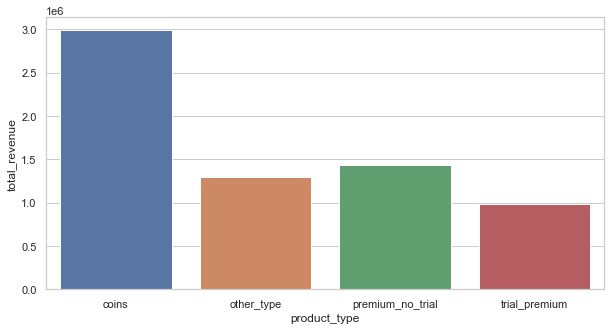

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(data=product_type_vs_profit_b, x="product_type", y="total_revenue") 

In [40]:
group_b_full.product_type.value_counts()

coins               106
premium_no_trial     76
trial_premium        62
other_type           29
Name: product_type, dtype: int64

In [41]:
group_b_full.uid.nunique()

146

In [42]:
# Получаем срез пользователей с типом продукта 'premium_no_trial'  # Get a slice of users with product type 'premium_no_trial'

group_b = group_b_full.query('product_type == "premium_no_trial"')
group_b.head()

,uid,age,attraction_coeff,coins,country_x,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,country_y,joined_at,paid_at,revenue,payment_id,from_page,product_type
5,892426491,48,625,NaN,United States of America,"1,2,3",1,25,61,56,1.0,NaN,12597,United States of America,2017-10-14 10:13:00,2017-10-15 22:39:00,12597,147,autoreply_message,premium_no_trial
6,891558921,38,470,6.0,United States of America,"9,11",1,22,40,17,1.0,1.0,9997,United States of America,2017-01-11 03:07:00,2017-10-11 09:05:00,9100,147,left_sidebar_menu,premium_no_trial
11,891861048,35,319,6.0,Canada,"1,2,3,4,5,6,7,8,9,10,16",1,32,38,219,1.0,1.0,21359,Canada,2017-10-26 02:55:00,2017-10-11 19:00:00,3588,68,none,premium_no_trial
12,891178380,42,275,85.0,Spain,"1,2,4,5,6,7",1,26,36,287,1.0,1.0,129870,Spain,2017-08-11 03:54:00,2017-09-11 21:53:00,113477,147,promo_09,premium_no_trial
21,891312873,21,125,16.0,Italy,"1,2,3,4,5,6,7,8,9",1,16,23,48,1.0,1.0,11778,Italy,2017-05-11 21:22:00,2017-10-11 21:51:00,7852,147,promo_09,premium_no_trial


In [43]:
group_b.shape

(76, 20)

In [44]:
group_b.uid.nunique()  # уникальных ID в группе В только 67 штук  # unique IDs in group B only 67 pieces

67

In [45]:
group_b.uid.value_counts()

892339626    3
892065108    3
892097937    3
891861048    2
891725043    2
            ..
891861594    1
891564672    1
891806436    1
891558921    1
891447105    1
Name: uid, Length: 67, dtype: int64

In [46]:
group_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 5 to 269
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   uid               76 non-null     int64         
 1   age               76 non-null     int64         
 2   attraction_coeff  76 non-null     int64         
 3   coins             30 non-null     float64       
 4   country_x         76 non-null     object        
 5   visit_days        73 non-null     object        
 6   gender            76 non-null     int64         
 7   age_filter_start  76 non-null     int64         
 8   age_filter_end    76 non-null     int64         
 9   views_count       76 non-null     int64         
 10  was_premium       76 non-null     float64       
 11  is_premium        69 non-null     float64       
 12  total_revenue     76 non-null     int64         
 13  country_y         76 non-null     object        
 14  joined_at         76 non-nu

<AxesSubplot:>

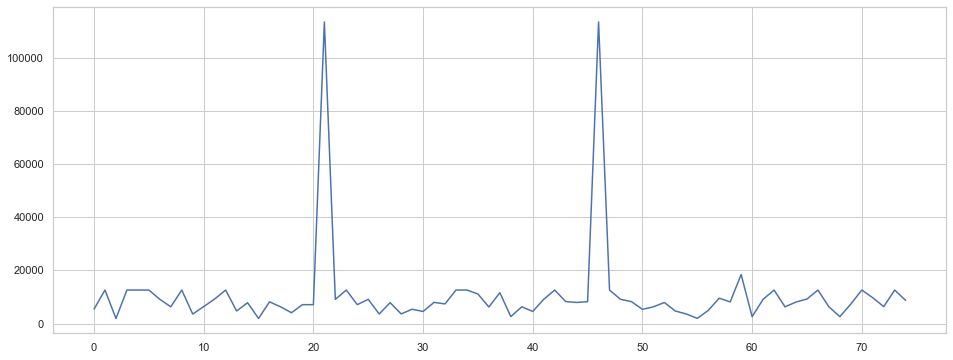

In [47]:
group_b.groupby(['paid_at'], as_index=False).agg({'revenue': 'sum'}).revenue.plot()

<AxesSubplot:>

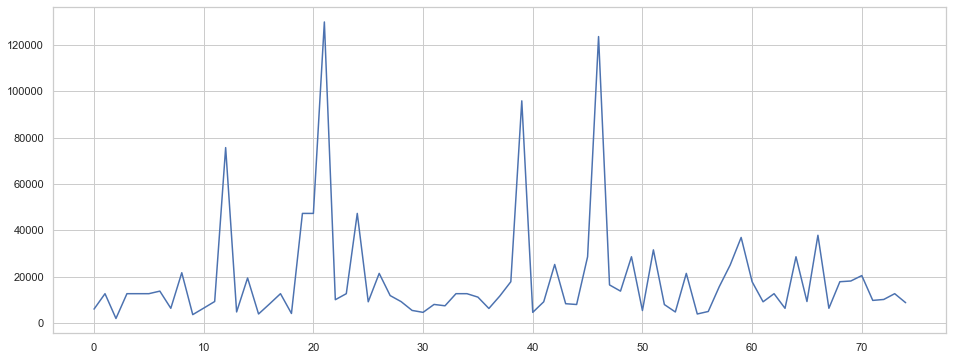

In [48]:
group_b.groupby(['paid_at'], as_index=False).agg({'total_revenue': 'sum'}).total_revenue.plot()

<AxesSubplot:xlabel='paid_at', ylabel='revenue'>

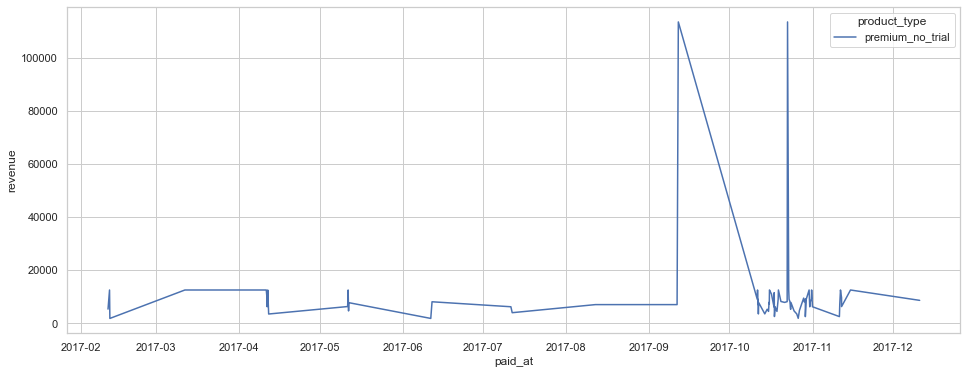

In [49]:
sns.lineplot(x='paid_at', y ='revenue', hue='product_type', data=group_b)

>

In [50]:
#                                         1.2. Контрольные группы

####                                      1.2. Контрольные группы

####                                       1.2.  Control groups

In [51]:
users_control_1.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892319115,25,435,NaN,United States of America,"1,2,3,4,5,6",0,22,32,982,NaN,NaN,0
1,891248523,29,500,NaN,United States of America,"1,2",1,26,32,12,NaN,NaN,0
2,891670932,33,800,NaN,France,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,NaN,NaN,0
3,891060786,26,0,NaN,Argentina,"1,2,3,4,5",1,23,29,0,NaN,NaN,0
4,892006554,35,294,NaN,United States of America,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,NaN,NaN,0


In [52]:
users_control_1.shape

(4340, 13)

In [53]:
users_control_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4340 non-null   int64  
 1   age               4340 non-null   int64  
 2   attraction_coeff  4340 non-null   int64  
 3   coins             60 non-null     float64
 4   country           4340 non-null   object 
 5   visit_days        3016 non-null   object 
 6   gender            4340 non-null   int64  
 7   age_filter_start  4340 non-null   int64  
 8   age_filter_end    4340 non-null   int64  
 9   views_count       4340 non-null   int64  
 10  was_premium       436 non-null    float64
 11  is_premium        192 non-null    float64
 12  total_revenue     4340 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 440.9+ KB


In [54]:
users_control_1.describe()

,uid,age,attraction_coeff,coins,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
count,4.340000e+03,4340.000000,4340.000000,60.0000,4340.000000,4340.000000,4340.000000,4340.000000,436.0,192.0,4340.000000
mean,8.917578e+08,32.095392,312.048848,1745.9000,0.958065,26.793779,38.553226,44.467512,1.0,1.0,594.761982
std,1.125683e+06,10.257466,320.972130,12902.3577,0.200465,9.405103,15.226951,204.800272,0.0,0.0,7987.922925
min,8.910510e+08,16.000000,0.000000,1.0000,0.000000,13.000000,19.000000,0.000000,1.0,1.0,0.000000
25%,8.913626e+08,24.000000,0.000000,8.0000,1.000000,19.000000,28.000000,1.000000,1.0,1.0,0.000000
50%,8.917272e+08,30.000000,238.500000,11.5000,1.000000,25.000000,35.000000,6.000000,1.0,1.0,0.000000
75%,8.920898e+08,38.000000,518.000000,28.0000,1.000000,32.000000,45.000000,21.000000,1.0,1.0,0.000000
max,9.609370e+08,99.000000,1000.000000,99958.0000,1.000000,96.000000,102.000000,4953.000000,1.0,1.0,486330.000000


In [55]:
users_control_1.uid.nunique()      # все пользователи уникальны  # all users are unique

4340

In [56]:
users_control_1.country.nunique()  # из какого количества стран  # from how many countries

40

In [57]:
users_control_1.query('total_revenue == 0').shape[0]  # Из 4340 платежей 4148 равны 0  # out of 4340 payments 4148 are 0   

4148

>

In [58]:
transactions_control_1.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium
2,891822480.0,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins
3,891367521.0,Italy,2017-05-11 02:37:00,2017-06-11 19:15:00,1456.0,127.0,sympathy,other_type
4,892207959.0,France,2017-10-18 18:30:00,2017-12-11 12:03:00,1261.0,19.0,empty_likes,coins


In [59]:
transactions_control_1.shape

(1007, 8)

In [60]:
transactions_control_1.info()  # полный набор, без проблем, кроме "пустышек"  # complete set, no problems, except for "pacifiers"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           377 non-null    float64       
 1   country       377 non-null    object        
 2   joined_at     377 non-null    datetime64[ns]
 3   paid_at       377 non-null    datetime64[ns]
 4   revenue       377 non-null    float64       
 5   payment_id    377 non-null    float64       
 6   from_page     377 non-null    object        
 7   product_type  377 non-null    object        
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 63.1+ KB


In [61]:
# Убираем строки с пропущенными значениями  # Remove lines with missing values

transactions_control_1 = transactions_control_1.dropna(subset=['product_type'])

In [62]:
transactions_control_1.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium
2,891822480.0,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins
3,891367521.0,Italy,2017-05-11 02:37:00,2017-06-11 19:15:00,1456.0,127.0,sympathy,other_type
4,892207959.0,France,2017-10-18 18:30:00,2017-12-11 12:03:00,1261.0,19.0,empty_likes,coins


In [63]:
transactions_control_1.shape

(377, 8)

In [64]:
transactions_control_1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 376
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           377 non-null    float64       
 1   country       377 non-null    object        
 2   joined_at     377 non-null    datetime64[ns]
 3   paid_at       377 non-null    datetime64[ns]
 4   revenue       377 non-null    float64       
 5   payment_id    377 non-null    float64       
 6   from_page     377 non-null    object        
 7   product_type  377 non-null    object        
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 26.5+ KB


In [65]:
transactions_control_1.uid.nunique()  # не все пользователи уникальны  # not all users are unique

193

In [66]:
transactions_control_1.uid.value_counts()

892333905.0    27
892069554.0    11
891367521.0    10
891707061.0    10
892366260.0    10
               ..
891568008.0     1
892047282.0     1
892323186.0     1
891946920.0     1
891458229.0     1
Name: uid, Length: 193, dtype: int64

In [67]:
transactions_control_1.describe(include='object')

,country,from_page,product_type
count,377,377,377
unique,18,25,4
top,United States of America,empty_likes,coins
freq,105,99,149


In [68]:
transactions_control_1.describe(include='datetime')

C:\Users\user\AppData\Local\Temp\ipykernel_8976\4159508201.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transactions_control_1.describe(include='datetime')
C:\Users\user\AppData\Local\Temp\ipykernel_8976\4159508201.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transactions_control_1.describe(include='datetime')


,joined_at,paid_at
count,377,377
unique,193,335
top,2017-10-16 01:38:00,2017-10-16 02:08:00
freq,27,5
first,2015-01-19 11:49:00,2016-12-14 16:16:00
last,2017-10-31 22:17:00,2017-12-11 21:57:00


In [69]:
transactions_control_1.groupby('product_type').agg({'revenue': 'sum'})

,revenue
product_type,
coins,871910.0
other_type,188422.0
premium_no_trial,779259.0
trial_premium,772720.0


In [70]:
 transactions_control_1.groupby('product_type', as_index=False).agg({'uid': 'count'})

,product_type,uid
0,coins,149
1,other_type,55
2,premium_no_trial,106
3,trial_premium,67


In [71]:
transactions_control_1.query('product_type == "premium_no_trial"').groupby('uid', as_index=False).agg({'revenue': 'count'})

,uid,revenue
0,891092322.0,1
1,891120969.0,1
2,891130164.0,1
3,891131061.0,1
4,891142386.0,1
...,...,...
94,892366260.0,2
95,892380033.0,1
96,892393119.0,2
97,892405224.0,1


In [72]:
transactions_control_1.query('product_type == "premium_no_trial"').groupby('uid', as_index=False).agg({'revenue': 'sum'})

,uid,revenue
0,891092322.0,5278.0
1,891120969.0,6292.0
2,891130164.0,4537.0
3,891131061.0,6292.0
4,891142386.0,4680.0
...,...,...
94,892366260.0,12584.0
95,892380033.0,4732.0
96,892393119.0,3614.0
97,892405224.0,6292.0


In [73]:
# Объединяем данные  # Combine data

group_a1_full = users_control_1.merge(transactions_control_1, how='right', on='uid')
group_a1_full.head()

,uid,age,attraction_coeff,coins,country_x,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,country_y,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891319275,27,0,NaN,France,"1,2,3",1,24,30,2,1.0,1.0,13455,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium
1,892421826,31,43,NaN,Israel,"1,2,4,6,7,10,11,12,13,14,15,17,18,19,20,21,22,...",1,28,34,69,1.0,1.0,14586,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium
2,891822480,28,337,10.0,Italy,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19",1,25,31,77,1.0,1.0,17810,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins
3,891367521,25,129,1.0,Italy,"1,2,3,5,6,7,8",1,16,99,62,1.0,NaN,20462,Italy,2017-05-11 02:37:00,2017-06-11 19:15:00,1456.0,127.0,sympathy,other_type
4,892207959,21,230,NaN,France,"1,2,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20...",1,18,24,430,1.0,1.0,18902,France,2017-10-18 18:30:00,2017-12-11 12:03:00,1261.0,19.0,empty_likes,coins


In [74]:
group_a1_full.shape

(377, 20)

In [75]:
group_a1_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 376
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   uid               377 non-null    int64         
 1   age               377 non-null    int64         
 2   attraction_coeff  377 non-null    int64         
 3   coins             215 non-null    float64       
 4   country_x         377 non-null    object        
 5   visit_days        360 non-null    object        
 6   gender            377 non-null    int64         
 7   age_filter_start  377 non-null    int64         
 8   age_filter_end    377 non-null    int64         
 9   views_count       377 non-null    int64         
 10  was_premium       349 non-null    float64       
 11  is_premium        304 non-null    float64       
 12  total_revenue     377 non-null    int64         
 13  country_y         377 non-null    object        
 14  joined_at         377 non-

In [76]:
product_type_vs_profit_a1 = group_a1_full.groupby('product_type', as_index=False).total_revenue.sum()
product_type_vs_profit_a1

,product_type,total_revenue
0,coins,10126402
1,other_type,6067399
2,premium_no_trial,1700257
3,trial_premium,813995


<AxesSubplot:xlabel='product_type', ylabel='total_revenue'>

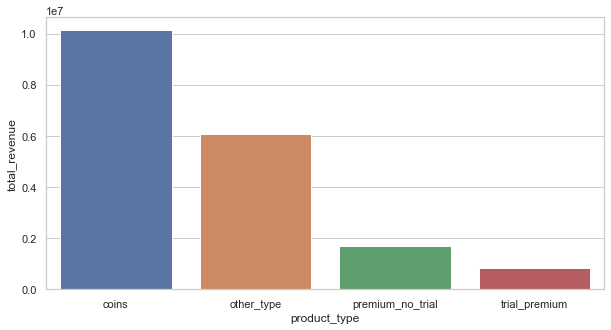

In [77]:
plt.figure(figsize=(10,5))
sns.barplot(data=product_type_vs_profit_a1, x="product_type", y="total_revenue")

In [78]:
group_a1_full.product_type.value_counts()

coins               149
premium_no_trial    106
trial_premium        67
other_type           55
Name: product_type, dtype: int64

In [79]:
# Получаем срез пользователей с типом продукта 'premium_no_trial'  # Get a slice of users with product type 'premium_no_trial'

group_a1 = group_a1_full.query('product_type == "premium_no_trial"')
group_a1.head()

,uid,age,attraction_coeff,coins,country_x,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,country_y,joined_at,paid_at,revenue,payment_id,from_page,product_type
11,891716358,25,935,NaN,India,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17",1,22,28,171,1.0,1.0,4914,India,2017-10-29 06:55:00,2017-10-29 23:17:00,4914.0,147.0,dating,premium_no_trial
15,891131061,23,192,NaN,Chile,"1,2,3,4,5,6",1,20,26,52,1.0,1.0,10075,Chile,2017-09-11 07:04:00,2017-09-11 23:38:00,6292.0,147.0,left_sidebar_menu,premium_no_trial
25,891142386,25,0,NaN,Switzerland,NaN,1,22,28,0,1.0,1.0,4680,Switzerland,2017-08-11 23:02:00,2017-08-11 23:38:00,4680.0,147.0,left_sidebar_menu,premium_no_trial
30,892421277,22,446,62.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,16,35,130,1.0,1.0,60333,United States of America,2017-10-14 13:05:00,2017-10-15 13:11:00,47723.0,147.0,promo_09,premium_no_trial
36,891092322,24,125,10.0,Argentina,"1,2,3,4,5,6",1,16,31,8,1.0,1.0,9945,Argentina,2017-09-11 22:48:00,2017-10-11 01:18:00,5278.0,147.0,autoreply_message,premium_no_trial


In [80]:
group_a1.shape

(106, 20)

In [81]:
group_a1.uid.nunique()

99

In [82]:
group_a1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 11 to 376
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   uid               106 non-null    int64         
 1   age               106 non-null    int64         
 2   attraction_coeff  106 non-null    int64         
 3   coins             39 non-null     float64       
 4   country_x         106 non-null    object        
 5   visit_days        102 non-null    object        
 6   gender            106 non-null    int64         
 7   age_filter_start  106 non-null    int64         
 8   age_filter_end    106 non-null    int64         
 9   views_count       106 non-null    int64         
 10  was_premium       106 non-null    float64       
 11  is_premium        93 non-null     float64       
 12  total_revenue     106 non-null    int64         
 13  country_y         106 non-null    object        
 14  joined_at         106 non

<AxesSubplot:>

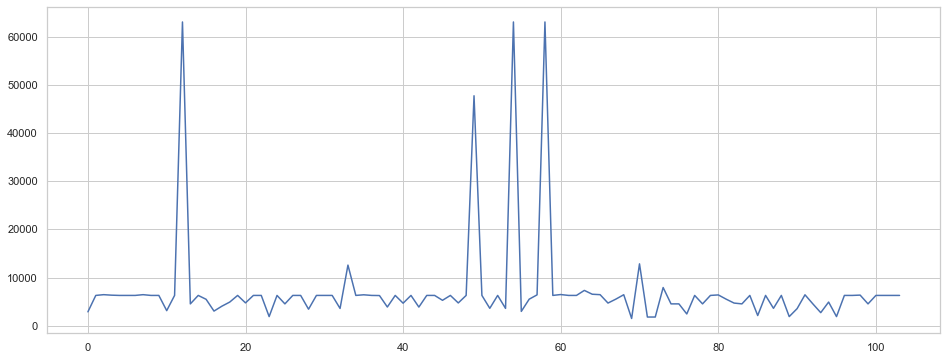

In [83]:
group_a1.groupby(['paid_at'], as_index=False).agg({'revenue': 'sum'}).revenue.plot()

<AxesSubplot:>

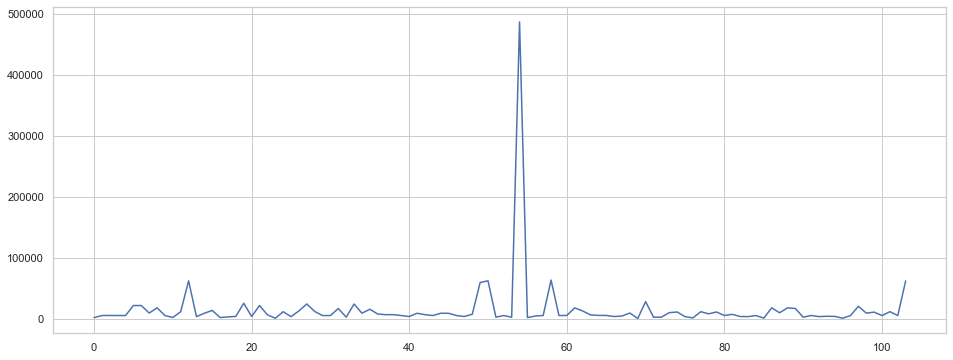

In [84]:
group_a1.groupby(['paid_at'], as_index=False).agg({'total_revenue': 'sum'}).total_revenue.plot()

<AxesSubplot:xlabel='paid_at', ylabel='revenue'>

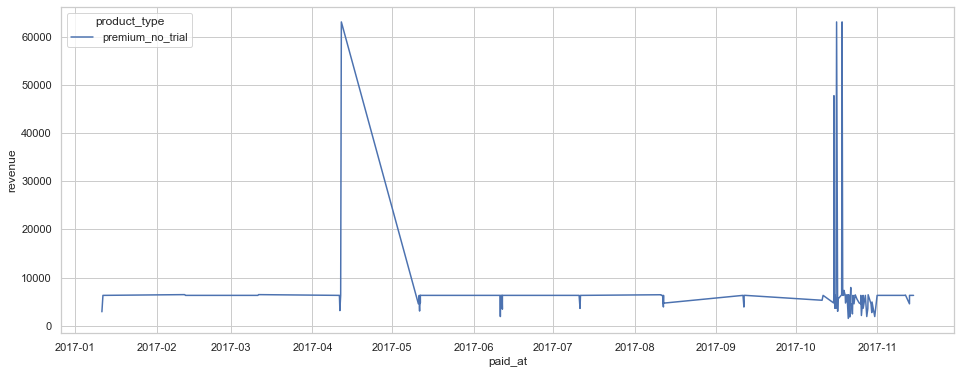

In [85]:
sns.lineplot(x='paid_at', y='revenue', hue='product_type', data=group_a1)

>

In [86]:
users_control_2.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892035504,37,137,NaN,Israel,"1,2,3,4,5,6,7,8,9,11,13",1,30,40,51,NaN,NaN,0
1,891782112,57,0,NaN,Italy,1,1,54,60,0,NaN,NaN,0
2,891110337,30,769,NaN,France,"1,2,3,4,5",1,27,33,13,NaN,NaN,0
3,891796320,48,750,NaN,France,"1,4,6,8,10,11,12,14,15,16,18",1,45,51,12,NaN,NaN,0
4,891880212,54,638,NaN,United States of America,1,1,35,53,94,NaN,NaN,0


In [87]:
users_control_2.shape

(4264, 13)

In [88]:
users_control_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264 entries, 0 to 4263
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4264 non-null   int64  
 1   age               4264 non-null   int64  
 2   attraction_coeff  4264 non-null   int64  
 3   coins             61 non-null     float64
 4   country           4264 non-null   object 
 5   visit_days        2900 non-null   object 
 6   gender            4264 non-null   int64  
 7   age_filter_start  4264 non-null   int64  
 8   age_filter_end    4264 non-null   int64  
 9   views_count       4264 non-null   int64  
 10  was_premium       411 non-null    float64
 11  is_premium        191 non-null    float64
 12  total_revenue     4264 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 433.2+ KB


In [89]:
users_control_2.describe()

,uid,age,attraction_coeff,coins,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
count,4.264000e+03,4264.000000,4264.000000,61.000000,4264.000000,4264.000000,4264.000000,4264.000000,411.0,191.0,4264.000000
mean,8.917694e+08,32.046201,317.957317,18.147541,0.954268,26.954268,38.906895,45.064493,1.0,1.0,450.384146
std,2.520759e+06,10.170721,326.191737,35.439543,0.208927,9.546657,15.955574,318.188992,0.0,0.0,2859.242228
min,8.910509e+08,16.000000,0.000000,1.000000,0.000000,13.000000,19.000000,0.000000,1.0,1.0,0.000000
25%,8.913453e+08,25.000000,0.000000,4.000000,1.000000,19.000000,28.000000,1.000000,1.0,1.0,0.000000
50%,8.917205e+08,30.000000,250.000000,10.000000,1.000000,25.000000,35.000000,6.000000,1.0,1.0,0.000000
75%,8.920735e+08,38.000000,548.500000,20.000000,1.000000,32.000000,45.000000,20.000000,1.0,1.0,0.000000
max,1.053059e+09,99.000000,1000.000000,271.000000,1.000000,94.000000,99.000000,16157.000000,1.0,1.0,81796.000000


In [90]:
users_control_2.uid.nunique()  # все пользователи уникальны  # all users are unique

4264

In [91]:
users_control_2.country.nunique()  # из какого количества стран  # from how many countries

45

In [92]:
users_control_2.query('total_revenue == 0').shape[0]  # из 4264 платежей 4077 равны 0  # out of 4264 payments 4077 are 0  

4077

>

In [93]:
transactions_control_2.head()

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891266616,Argentina,2017-06-11 15:25:00,2017-10-11 17:35:00,6305,19,autorefill,coins
1,892186737,Chile,2017-10-19 06:03:00,2017-04-11 08:53:00,4732,147,promo_09,premium_no_trial
2,891959004,United States of America,2017-10-24 00:12:00,2017-10-31 02:12:00,10153,147,trial_vip_popup,trial_premium
3,892115478,Spain,2017-10-20 20:39:00,2017-10-26 06:26:00,2366,67,empty_likes,other_type
4,891592941,Switzerland,2017-10-31 12:40:00,2017-03-11 16:25:00,6292,147,promo_09,premium_no_trial


In [94]:
transactions_control_2.shape

(328, 8)

In [95]:
transactions_control_2.info()  # полный df, без проблем 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           328 non-null    int64         
 1   country       328 non-null    object        
 2   joined_at     328 non-null    datetime64[ns]
 3   paid_at       328 non-null    datetime64[ns]
 4   revenue       328 non-null    int64         
 5   payment_id    328 non-null    int64         
 6   from_page     328 non-null    object        
 7   product_type  328 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 20.6+ KB


In [96]:
transactions_control_2.uid.nunique()  # не все пользователи уникальны  # not all users are unique

187

In [97]:
transactions_control_2.uid.value_counts()

891637005    11
892230228    10
891080040     8
892139829     6
892128138     5
             ..
891911091     1
891312516     1
892204536     1
891532506     1
891459291     1
Name: uid, Length: 187, dtype: int64

In [98]:
transactions_control_2.describe(include='object')

,country,from_page,product_type
count,328,328,328
unique,19,18,4
top,United States of America,empty_likes,coins
freq,107,101,124


In [99]:
transactions_control_2.describe(include='datetime')

C:\Users\user\AppData\Local\Temp\ipykernel_8976\4013469781.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transactions_control_2.describe(include='datetime')
C:\Users\user\AppData\Local\Temp\ipykernel_8976\4013469781.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transactions_control_2.describe(include='datetime')


,joined_at,paid_at
count,328,328
unique,187,309
top,2017-10-30 15:22:00,2017-10-23 20:17:00
freq,11,3
first,2017-01-11 08:36:00,2017-01-11 05:34:00
last,2017-10-31 17:43:00,2017-12-11 23:28:00


In [100]:
 transactions_control_2.groupby('product_type').agg({'revenue': 'sum'})

,revenue
product_type,
coins,402909
other_type,128739
premium_no_trial,744809
trial_premium,643981


In [101]:
 transactions_control_2.groupby('product_type').agg({'uid': 'count'})

,uid
product_type,
coins,124
other_type,44
premium_no_trial,107
trial_premium,53


In [102]:
transactions_control_2.query('product_type == "premium_no_trial"').groupby('uid', as_index=False).agg({'revenue': 'count'})

,uid,revenue
0,891068079,1
1,891077727,1
2,891112263,1
3,891136632,1
4,891143379,1
...,...,...
97,892343331,1
98,892354854,1
99,892364742,1
100,892385232,1


In [103]:
transactions_control_2.query('product_type == "premium_no_trial"').groupby('uid', as_index=False).agg({'revenue': 'sum'})

,uid,revenue
0,891068079,6292
1,891077727,6292
2,891112263,4680
3,891136632,10413
4,891143379,6500
...,...,...
97,892343331,2873
98,892354854,6435
99,892364742,4797
100,892385232,6292


In [104]:
# Объединяем данные  # Combine data

group_a2_full = users_control_2.merge(transactions_control_2, how='right', on='uid')
group_a2_full.head()

,uid,age,attraction_coeff,coins,country_x,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,country_y,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891266616,28,229,6.0,Argentina,"1,2,3,4,5,6,7,8,9",1,18,45,48,1.0,1.0,18902,Argentina,2017-06-11 15:25:00,2017-10-11 17:35:00,6305,19,autorefill,coins
1,892186737,30,250,NaN,Chile,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16",1,27,33,8,1.0,1.0,4732,Chile,2017-10-19 06:03:00,2017-04-11 08:53:00,4732,147,promo_09,premium_no_trial
2,891959004,45,0,NaN,United States of America,"1,2,3,4,6,7,8,9,10,11,12,13,15,16,17,18,19,20,...",1,42,48,0,1.0,1.0,10153,United States of America,2017-10-24 00:12:00,2017-10-31 02:12:00,10153,147,trial_vip_popup,trial_premium
3,892115478,40,99,NaN,Spain,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16",1,37,43,994,1.0,1.0,11154,Spain,2017-10-20 20:39:00,2017-10-26 06:26:00,2366,67,empty_likes,other_type
4,891592941,38,112,4.0,Switzerland,"1,2,3,4,5,6,7,8,9,10,11,12,13",1,35,41,62,1.0,1.0,10192,Switzerland,2017-10-31 12:40:00,2017-03-11 16:25:00,6292,147,promo_09,premium_no_trial


In [105]:
group_a2_full.shape

(328, 20)

In [106]:
group_a2_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 327
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   uid               328 non-null    int64         
 1   age               328 non-null    int64         
 2   attraction_coeff  328 non-null    int64         
 3   coins             164 non-null    float64       
 4   country_x         328 non-null    object        
 5   visit_days        309 non-null    object        
 6   gender            328 non-null    int64         
 7   age_filter_start  328 non-null    int64         
 8   age_filter_end    328 non-null    int64         
 9   views_count       328 non-null    int64         
 10  was_premium       312 non-null    float64       
 11  is_premium        269 non-null    float64       
 12  total_revenue     328 non-null    int64         
 13  country_y         328 non-null    object        
 14  joined_at         328 non-

In [107]:
product_type_vs_profit_a2 = group_a2_full.groupby('product_type', as_index=False).total_revenue.sum()
product_type_vs_profit_a2

,product_type,total_revenue
0,coins,1802034
1,other_type,609830
2,premium_no_trial,1128205
3,trial_premium,726193


<AxesSubplot:xlabel='product_type', ylabel='total_revenue'>

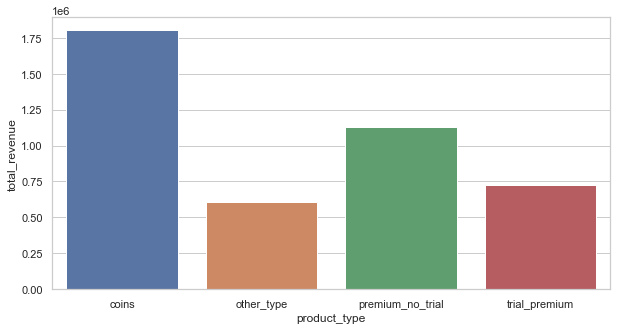

In [108]:
plt.figure(figsize=(10,5))
sns.barplot(data=product_type_vs_profit_a2, x="product_type", y="total_revenue") 

In [109]:
group_a2_full.product_type.value_counts()

coins               124
premium_no_trial    107
trial_premium        53
other_type           44
Name: product_type, dtype: int64

In [110]:
group_a2_full.uid.nunique()

187

In [111]:
# Получаем срез пользователей с типом продукта 'premium_no_trial'  # Get a slice of users with product type 'premium_no_trial'

group_a2 = group_a2_full.query('product_type == "premium_no_trial"')
group_a2.head()

,uid,age,attraction_coeff,coins,country_x,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,country_y,joined_at,paid_at,revenue,payment_id,from_page,product_type
1,892186737,30,250,NaN,Chile,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16",1,27,33,8,1.0,1.0,4732,Chile,2017-10-19 06:03:00,2017-04-11 08:53:00,4732,147,promo_09,premium_no_trial
4,891592941,38,112,4.0,Switzerland,"1,2,3,4,5,6,7,8,9,10,11,12,13",1,35,41,62,1.0,1.0,10192,Switzerland,2017-10-31 12:40:00,2017-03-11 16:25:00,6292,147,promo_09,premium_no_trial
5,892245918,34,622,NaN,France,"1,2,3,4,5,6,7,8,11,12,13,14,15,16,17,18,19,20,...",1,20,39,61,1.0,1.0,6292,France,2017-10-17 21:05:00,2017-10-17 22:35:00,6292,147,autoreply_message,premium_no_trial
7,891267564,29,130,10.0,Portugal,"1,2,3,4,7,8",1,21,37,23,1.0,1.0,2964,Portugal,2017-06-11 15:06:00,2017-07-11 13:54:00,1482,68,none,premium_no_trial
9,892080081,26,267,16.0,Switzerland,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,23,29,56,1.0,1.0,13104,Switzerland,2017-10-21 15:15:00,2017-10-22 16:37:00,4758,147,autoreply_message,premium_no_trial


In [112]:
group_a2.shape

(107, 20)

In [113]:
group_a2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 1 to 327
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   uid               107 non-null    int64         
 1   age               107 non-null    int64         
 2   attraction_coeff  107 non-null    int64         
 3   coins             33 non-null     float64       
 4   country_x         107 non-null    object        
 5   visit_days        98 non-null     object        
 6   gender            107 non-null    int64         
 7   age_filter_start  107 non-null    int64         
 8   age_filter_end    107 non-null    int64         
 9   views_count       107 non-null    int64         
 10  was_premium       107 non-null    float64       
 11  is_premium        97 non-null     float64       
 12  total_revenue     107 non-null    int64         
 13  country_y         107 non-null    object        
 14  joined_at         107 non-

In [114]:
group_a2.uid.nunique()

102

<AxesSubplot:>

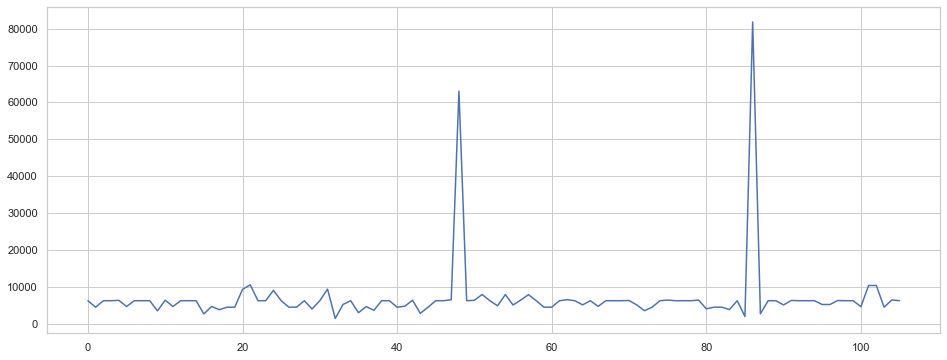

In [115]:
group_a2.groupby(['paid_at'], as_index=False).agg({'revenue': 'sum'}).revenue.plot()

<AxesSubplot:>

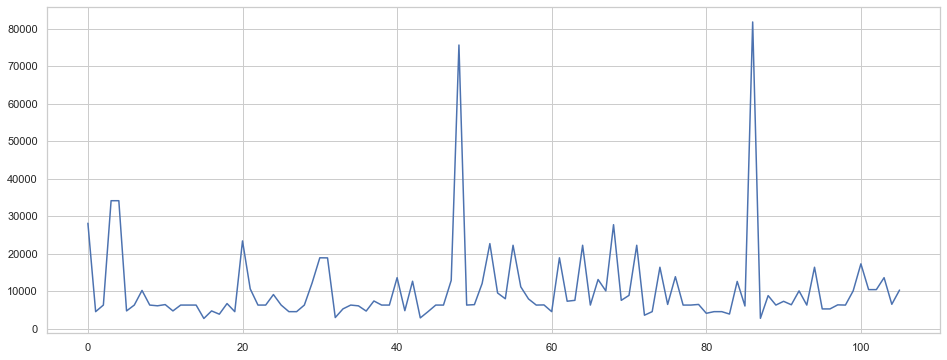

In [116]:
group_a2.groupby(['paid_at'], as_index=False).agg({'total_revenue': 'sum'}).total_revenue.plot()

<AxesSubplot:xlabel='paid_at', ylabel='revenue'>

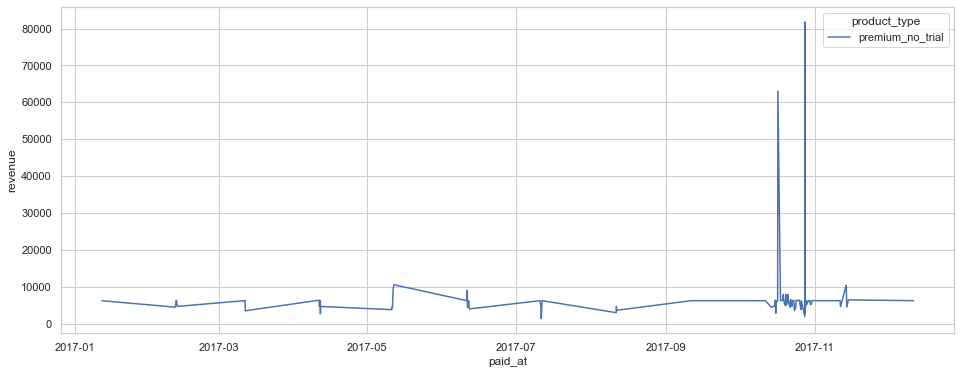

In [117]:
sns.lineplot(x='paid_at', y='revenue', hue='product_type', data=group_a2)

>

In [118]:
#                                  1.3. Некоторые уточнения согласно условиям эксперимента.

####                                  1.3. Некоторые уточнения согласно условиям эксперимента.

####                     1.3. Some clarifications according to the conditions of the experiment.

In [119]:
#   Подразумевается, что эксперимент проводился в один и тот же временной период для всех групп. 
#   Т.е. время начала и конца эксперимента в группах А1,А2,В должно быть синхронизированно. 
#   Что это за интервал времени?
#                      c '2017-02-11 00:13:00' по '2017-11-14 16:50:00'


Подразумевается, что эксперимент проводился в один и тот же временной период для всех групп.  То есть время начала и конца эксперимента в группах 'А1', 'А2', 'В' должно быть синхронизированно.  Определим, что это за интервал времени?


It is assumed that the experiment was carried out in the same time period for all groups.\
The start and end times of the experiment in groups 'A1', 'A2', 'B' must be synchronized.\
What is this time interval?

In [120]:
group_b.paid_at.min()

Timestamp('2017-02-11 00:13:00')

In [121]:
group_b.paid_at.max()

Timestamp('2017-12-11 00:11:00')

In [122]:
group_a1.paid_at.min()

Timestamp('2017-01-11 05:16:00')

In [123]:
group_a1.paid_at.max()

Timestamp('2017-11-14 16:50:00')

In [124]:
group_a2.paid_at.min()

Timestamp('2017-01-11 22:36:00')

In [125]:
group_a2.paid_at.max()

Timestamp('2017-12-11 15:23:00')

In [126]:
lower_edge_time = max(group_b.paid_at.min(), group_a1.paid_at.min(), group_a2.paid_at.min())

In [127]:
lower_edge_time

Timestamp('2017-02-11 00:13:00')

In [128]:
upper_edge_time = min(group_b.paid_at.max(), group_a1.paid_at.max(), group_a2.paid_at.max())

In [129]:
upper_edge_time

Timestamp('2017-11-14 16:50:00')

In [130]:
# Что это за интервал времени?
#                      c '2017-02-11 00:13:00' по '2017-11-14 16:50:00'

# Приводим группы к временным границам эксперимента

Уточнили четкие временные границы эксперимента: c '2017-02-11 00:13:00' по '2017-11-14 16:50:00'.\
Приводим группы к единым временным границам эксперимента    

We clarified the clear time limits of the experiment: from '2017-02-11 00:13:00' to '2017-11-14 16:50:00'.\
We bring the groups to the same time limits of the experiment.                      

In [131]:
group_b = group_b.query('(paid_at >= "2017-02-11 00:13:00") & (paid_at <= "2017-11-14 16:50:00")')
group_a1 = group_a1.query('(paid_at >= "2017-02-11 00:13:00") & (paid_at <= "2017-11-14 16:50:00")')
group_a2 = group_a2.query('(paid_at >= "2017-02-11 00:13:00") & (paid_at <= "2017-11-14 16:50:00")')

In [132]:
# Посмотрим на набор стран и количество участников (со всеми типами подписки) в группах

Посмотрим на набор стран и количество участников (со всеми типами подписки) в группах

Let's look at the set of countries and the number of participants (with all types of subscription) in the groups

In [133]:
group_b.country_x.nunique()

16

In [134]:
group_b.country_x.value_counts()

United States of America          20
Italy                              8
Spain                              6
France                             6
United Arab Emirates               6
Chile                              6
United Kingdom (Great Britain)     5
Canada                             4
Argentina                          4
Israel                             2
Germany                            2
Australia                          1
Mexico                             1
Turkey                             1
Latvia                             1
Belgium                            1
Name: country_x, dtype: int64

In [135]:
group_a1.country_x.nunique()

17

In [136]:
group_a1.country_x.value_counts()

United States of America          28
Italy                             15
France                            12
Israel                            10
Argentina                          5
Spain                              5
United Kingdom (Great Britain)     5
Germany                            4
Canada                             4
Chile                              4
Turkey                             3
United Arab Emirates               3
India                              2
Australia                          1
Portugal                           1
Switzerland                        1
Belgium                            1
Name: country_x, dtype: int64

In [137]:
group_a2.country_x.nunique()

17

In [138]:
group_a2.country_x.value_counts()

United States of America          33
United Kingdom (Great Britain)    11
Spain                             11
France                             8
Chile                              6
Argentina                          6
Belgium                            5
Portugal                           5
United Arab Emirates               4
Switzerland                        3
Italy                              3
Australia                          2
Germany                            2
Israel                             2
Ukraine                            1
Austria                            1
Canada                             1
Name: country_x, dtype: int64

In [139]:
full_0 = (users_test.uid + transactions_test.uid).dropna().drop_duplicates()  # группа "В" перед началом эксперимента  # group "B" before the start of the experiment
full_0.shape[0]                                                                        

273

In [140]:
full_1 = (users_control_1.uid + transactions_control_1.uid).dropna().drop_duplicates() # группа "А1" перед началом эксперимента  # group "A1" before the start of the experiment
full_1.shape[0]

377

In [141]:
full_2 = (users_control_2.uid + transactions_control_2.uid).dropna().drop_duplicates()  # группа "А2" перед началом эксперимента  # group "A2" before the start of the experiment
full_2.shape[0]

328

In [142]:

#     Таким образом, видим, что количество стран в контрольных группах А1,А2 одинаково; набор стран в группах А1,А2 несколько разнится;
#  пользователи между группами А1,А2 распределены не совсем равномерно и корректно - а ведь это должно являться важным
#  начальным условием для А/А теста.
#     Большой вопрос вызывает набор стран в тестовой группе В (на 1 страну меньше; выбраны несколько других стран; количество
#  пользователей из каждой страны не совпадает с аналогичным набором из контрольных групп А1,А2).
#     Кроме того, начальные, "сырые" данные говорят о 273 пользователях из группы "В", 377 из группы "А1", 328 из группы "А2".  
#     Создается общее впечатление, что эксперимент организован "нечисто", сплитование не совсем корректно,
#  вероятность ошибки возрастает. 



Таким образом, видим, что количество стран в контрольных группах А1, А2 одинаково; набор стран в группах А1, А2 несколько разнится;  пользователи между группами А1,А2 распределены не совсем равномерно и корректно - а ведь это должно являться важным
начальным условием для А/А теста.

Большой вопрос вызывает набор стран в тестовой группе В (на 1 страну меньше; выбраны несколько других стран; количество пользователей из каждой страны не совпадает с аналогичным набором из контрольных групп А1,А2).  Кроме того, начальные, "сырые" данные говорят о 273 пользователях из группы "В", 377 из группы "А1", 328 из группы А2".

Создается общее впечатление, что эксперимент организован "нечисто", сплитование не совсем корректно, вероятность ошибки возрастает. 



Thereby we see that the number of countries in the control groups "A1", "A2" is the same; the set of countries in groups "A1", "A2" is somewhat different; users between groups "A1", "A2" are not distributed evenly and correctly - and this should be an important initial condition for an A/A test.

The big question is the set of countries in test group "B" (1 country less; several other countries are selected; the number of users from each country does not match the similar set from the control groups "A1", "A2"). In addition, the initial data speaks of 273 users from the "B" group, 377 from the "A1" group, 328 from the "A2" group.

There is a general impression that the experiment is organized "impurely", the splitting is not entirely correct, and the probability of error increases.


In [143]:
#                                          2. ПРОВЕРКА УСПЕШНОСТИ ЭКСПЕРИМЕНТА 

####                                        2. ПРОВЕРКА УСПЕШНОСТИ ЭКСПЕРИМЕНТА 

####                                       2.  CHECKING THE SUCCESS OF THE EXPERIMENT

In [144]:

#   Проверим группы на нормальность распределения метрики 'revenue' внутри группы, используя тест Шапиро-Уилка.
#   Нулевая гипотеза H(0) в случае Шапиро-Уилка - нормальность распределения метрики.


Проверим группы на нормальность распределения метрики 'revenue' внутри группы, используя тест Шапиро-Уилка.  
Нулевая гипотеза H(0) в случае Шапиро-Уилка - нормальность распределения метрики.

Let's check the groups for the normal distribution of the 'revenue' metric within the group using the Shapiro-Wilk test.  
The null hypothesis H(0) in the Shapiro-Wilk case is the normality of the distribution of the metric.

In [145]:
data_column_a1 = group_a1['revenue'].to_frame()
data_column_a2 = group_a2['revenue'].to_frame()
data_column_b = group_b['revenue'].to_frame() 

In [146]:
stats.shapiro(data_column_a1)

ShapiroResult(statistic=0.29694753885269165, pvalue=4.451721266872738e-20)

In [147]:
stats.shapiro(data_column_a2)

ShapiroResult(statistic=0.23587727546691895, pvalue=7.95343448595756e-21)

In [148]:
stats.shapiro(data_column_b)

ShapiroResult(statistic=0.2974923253059387, pvalue=4.5554252466503925e-17)

In [149]:
# Итак, видим, что во всех случаях p<0.05, поэтому отклоняем H(0), распределение отличается от нормального - в условиях небольших
# выборок это исключает возможность применения T-критерия Стьюдента.

Итак, видим, что во всех случаях p<0.05, поэтому отклоняем H(0), распределение отличается от нормального - в условиях небольших  
выборок это исключает возможность применения T-критерия Стьюдента.

So, we see that in all cases p<0.05, so we reject H(0), the distribution differs from normal - under conditions of small  
of samples, this excludes the possibility of applying the Student's T-test.

In [150]:

#   Проверяем, сходится ли А1\A2 тест; используем непараметрический тест – U-критерий Манна-Уитни.


Проверяем, сходится ли А1\A2 тест; используем непараметрический тест – U-критерий Манна-Уитни.

Check if A1\A2 test converges; we use a nonparametric test - the Mann-Whitney U-test.

In [151]:
mannwhitneyu(data_column_a1, data_column_a2)  

MannwhitneyuResult(statistic=array([5186.5]), pvalue=array([0.59942998]))

In [152]:
#   Видим, что p>0.05, не можем отклонить гипотезу H(0) в паре A1/A2 - различий по метрике 'revenue' между группами нет.  

Видим, что p>0.05, не можем отклонить гипотезу H(0) в паре A1/A2 - различий по метрике 'revenue' между группами нет. 

We see that p>0.05, we cannot reject the hypothesis H(0) in the A1/A2 pair - there are no differences in the 'revenue' metric between the groups.

In [153]:
#   Было бы интересно проверить сходимость А1\A2 теста по другому:

Было бы интересно проверить сходимость А1\A2 теста по другому:

It would be interesting to check the convergence of the A1 \ A2 test in a different way:

  0%|          | 0/1000 [00:00<?, ?it/s]

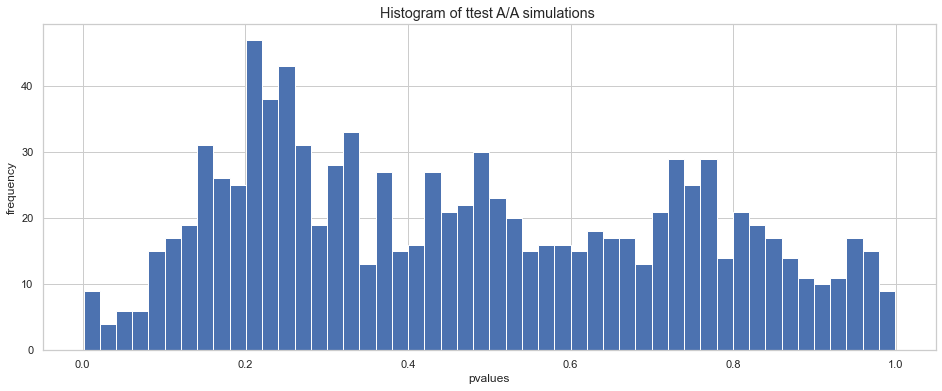

0.015

In [154]:
n = 104
simulations = 1000
n_s = 30
res = []

# running A/A test simulations
for i in tqdm(range(simulations)):
    s1 = group_a1['revenue'].sample(n_s, replace = False).values
    s2 = group_a2['revenue'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# checking that the number of false positive cases does not exceed alpha
sum(np.array(res) <0.05) / simulations

In [155]:
#   Видим, что FPR < альфа=0.05
#   A/A тест по метрике 'revenue' сходится, все нормально.

Видим, что FPR < альфа=0.05  
A/A тест по метрике 'revenue' сходится, все нормально.

We see that FPR < alpha=0.05  
A/A test on the 'revenue' metric converges, everything is fine.

>

In [156]:
# Переходим к анализу A1+A2/B теста

Переходим к анализу A1+A2/B теста

Let's move on to the analysis of the A1+A2/B test

In [157]:
data_column_a1.describe()

,revenue
count,104.000000
mean,7404.625000
std,10591.716251
min,1508.000000
25%,4537.000000
50%,6292.000000
75%,6292.000000
max,63037.000000


In [158]:
data_column_a2.describe()

,revenue
count,104.000000
mean,6978.250000
std,9427.657801
min,1482.000000
25%,4644.250000
50%,6292.000000
75%,6292.000000
max,81796.000000


In [159]:
data_column_b.describe()

,revenue
count,74.000000
mean,10667.729730
std,17540.225304
min,1898.000000
25%,5609.500000
50%,7943.000000
75%,9659.000000
max,113477.000000


In [160]:
data_column_a1_a2 = pd.concat([group_a1['revenue'], group_a2['revenue']], ignore_index=True).to_frame()
data_column_a1_a2 = data_column_a1_a2.astype('int64')
data_column_a1_a2.head()

,revenue
0,4914
1,6292
2,4680
3,47723
4,5278


In [161]:
data_column_a1_a2.max()

revenue    81796
dtype: int64

In [162]:
data_column_a1_a2.min()

revenue    1482
dtype: int64

<AxesSubplot:>

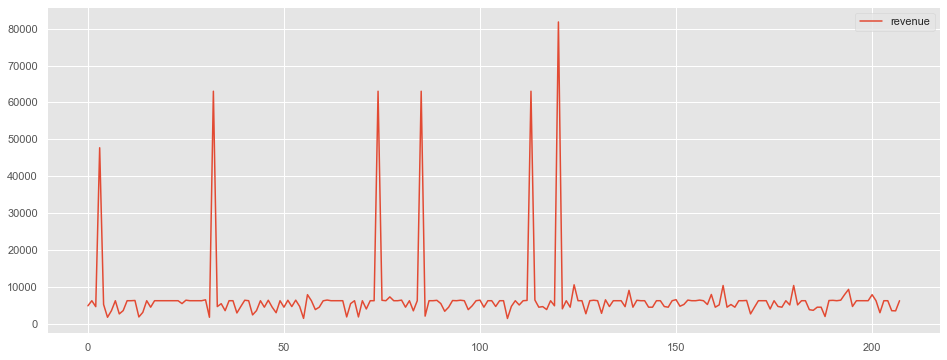

In [163]:
data_column_a1_a2.plot()

In [164]:
data_column_b.max()

revenue    113477
dtype: int64

In [165]:
data_column_b.min()

revenue    1898
dtype: int64

<AxesSubplot:>

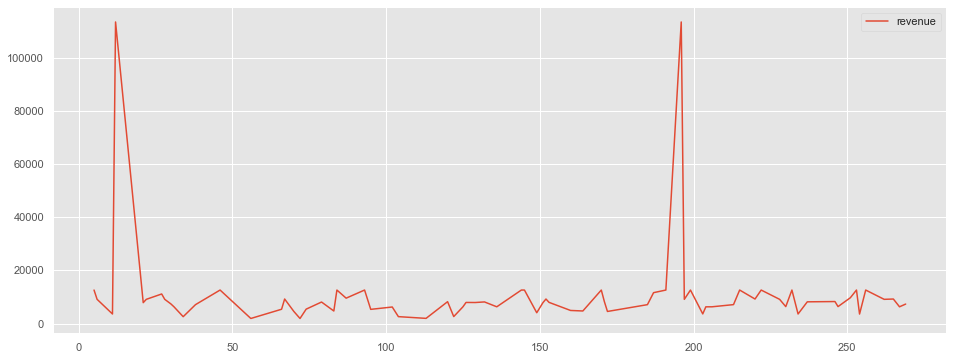

In [166]:
data_column_b.plot()

In [167]:

#    Применяем непараметрику Манна-Уитни.


Применяем непараметрику Манна-Уитни.

We apply the nonparametric Mann-Whitney test

In [168]:
mannwhitneyu(data_column_a1_a2, data_column_b) 

MannwhitneyuResult(statistic=array([4432.5]), pvalue=array([3.87743728e-08]))

In [169]:

#    Получаем p<0.05, что позволяет нам отвергнуть гипотезу H(0),
#    различия между тестовой группой В и контрольной A1+A2 по метрике 'revenue' достоверны. 


Получаем p<0.05, что позволяет нам отвергнуть гипотезу H(0), различия между тестовой группой В и контрольной A1+A2 по метрике 'revenue' достоверны. 


We get p<0.05, which allows us to reject the hypothesis H(0), differences between test group B and control group A1+A2 on the 'revenue' metric are significant.

In [170]:
# Было бы интересно проверить то же самое с помощью bootstrap:

Было бы интересно проверить то же самое с помощью bootstrap:

It would be interesting to test the same with bootstrap:

In [171]:
def get_bootstrap(
    data_column_1,
    data_column_2, 
    boot_it = 1000, 
    statistic = np.mean,
    bootstrap_conf_level = 0.95 
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): 
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True 
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean()
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Visualization
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

In [172]:
sample_1 = data_column_b
sample_2 = data_column_a1_a2

  0%|          | 0/1000 [00:00<?, ?it/s]

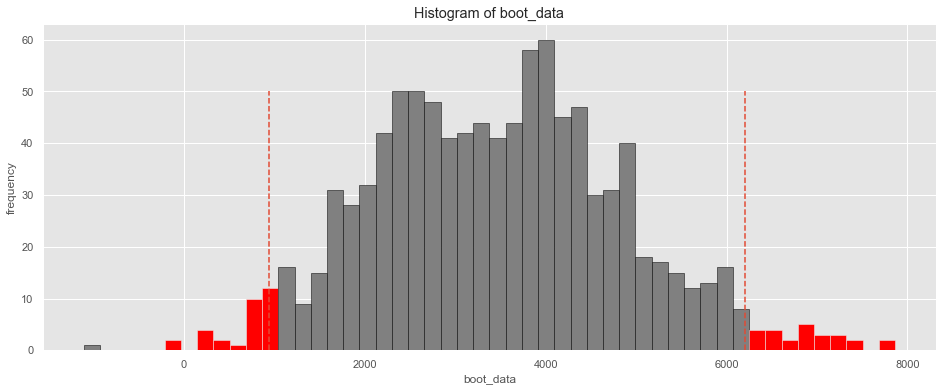

In [173]:
booted_data = get_bootstrap(sample_1, sample_2) 

In [174]:
booted_data["quants"]  # ДИ # Confidence interval 

,0
0.025,942.295313
0.975,6205.656250


In [175]:
booted_data["p_value"]  # альфа  # alpha

0.011768822306352985

In [176]:

# Итак, видим, что в случае применения bootstrap с параметром распределения mean, значение "0" не попадает в ДИ, P<0.05, 
# как следствие, можем отвергнуть гипотезу H(0) о том, что нет различий между контрольной и тестовой группой
# по метрике 'revenue'. Можем принять гипотезу H(1) - различия между группами по метрике 'revenue' - достоверны.


Итак, видим, что в случае применения bootstrap с параметром распределения mean, значение "0" не попадает в ДИ, P<0.05, как следствие,  
можем отвергнуть гипотезу H(0) о том, что нет различий между контрольной и тестовой группой по метрике 'revenue'.  
Можем принять гипотезу H(1) - различия между группами по метрике 'revenue' - достоверны.

So, we see that in the case of using bootstrap with the mean distribution parameter, the value "0" does not fall into the CI, P<0.05, as a result,  
we can reject the hypothesis H(0) that there are no differences between the control and test groups in terms of the 'revenue' metric.  
We can accept the hypothesis H(1) - the differences between the groups in terms of the 'revenue' metric are significant.

In [177]:
# Посмотрим Revenue по сегменту "premium_no_trial"

Посмотрим Revenue по сегменту "premium_no_trial"

Let's look at the Revenue for the segment "premium_no_trial"

In [178]:
Revenue_b = group_b.total_revenue.sum()      
Revenue_b

1412307

In [179]:
Revenue_a1 = group_a1.total_revenue.sum()    
Revenue_a1

1691079

In [180]:
Revenue_a2 = group_a2.total_revenue.sum()    
Revenue_a2

1083290

In [181]:
# Посмотрим Revenue (все типы подписки) 

Посмотрим Revenue (все типы подписки) 

Let's see Revenue (all subscription types)

In [182]:
Revenue_b = group_b_full.total_revenue.sum()  
Revenue_b

6700811

In [183]:
Revenue_a1 = group_a1_full.total_revenue.sum()    
Revenue_a1

18708053

In [184]:
Revenue_a2 = group_a2_full.total_revenue.sum()   
Revenue_a2

4266262

In [185]:
# Посмотрим метрику ARPPU

Посмотрим метрику ARPPU

Let's look at the ARPPU metric

In [186]:
ARPPU_b = group_b.total_revenue.sum() / group_b.uid.count()     # ARPPU тестовой группы "В" по сегменту "premium_no_trial"
ARPPU_b

19085.22972972973

In [187]:
ARPPU_a1 = group_a1.total_revenue.sum() / group_a1.uid.count()  # ARPPU тестовой группы "A1" по сегменту "premium_no_trial"
ARPPU_a1

16260.375

In [188]:
ARPPU_a2 = group_a2.total_revenue.sum() / group_a2.uid.count()   # ARPPU тестовой группы "A2" по сегменту "premium_no_trial"
ARPPU_a2

10416.25

In [189]:
# Посмотрим метрику Active Users (сегмент "premium_no_trial")

Посмотрим метрику Active Users (сегмент "premium_no_trial")

Let's look at the Active Users metric ("premium_no_trial" segment)

In [190]:
group_b.uid.nunique()

65

In [191]:
group_a1.uid.nunique()

97

In [192]:
group_a2.uid.nunique()

99

In [193]:
# Посмотрим метрику Active Users (все типы подписки)

Посмотрим метрику Active Users (все типы подписки)

Let's see the Active Users metric (all subscription types)

In [194]:
group_b_full.uid.nunique()

146

In [195]:
group_a1_full.uid.nunique()

193

In [196]:
group_a2_full.uid.nunique()

187

In [197]:

#  ВЫВОД:
#      Таким образом, можем констатировать, что эксперимент в целом был успешен. Есть вопросы к планированию эксперимента
#  (некорректное сплитование на группы), что может поставить под вопрос ценность полученных данных.

#      Проанализировав некоторыё основные метрики (Revenue, ARPPU, Active Users) можно увидеть, что за период эксперимента
#  в тестовой группе "В" размер Revenue стал несколько меньше, чем в группе "А1", но больше чем в "А2";  
#  количество Active Users в тестовой группе "В" упало по сравнению с "А1" и "А2" (можно предположить, что они ушли с
#  премиум-подписки в связи с изменившимися тарифами); в то же время за счет изменения стоимости премиум-подписки и
#  сокращения числа пользователей, в тестовой группе "В", по сравнению с группами "А1" и "А2", ощутимо выросла метрика ARPPU.


ВЫВОД: 
 
Таким образом, можем констатировать, что эксперимент в целом был успешен. Есть некоторые вопросы к планированию эксперимента
(некорректное сплитование на группы), что может поставить под вопрос ценность полученных данных.  
Проанализировав некоторыё основные метрики (Revenue, ARPPU, Active Users) можно увидеть, что за период эксперимента
в тестовой группе "В" размер Revenue стал несколько меньше, чем в группе "А1", но больше чем в "А2"; количество Active Users в тестовой группе "В" упало по сравнению с "А1" и "А2" (можно предположить, что они ушли с
премиум-подписки в связи с изменившимися тарифами); в то же время за счет изменения стоимости премиум-подписки и
сокращения числа пользователей, в тестовой группе "В", по сравнению с группами "А1" и "А2", ощутимо выросла метрика ARPPU.


CONCLUSION:

Thus, we can state that the experiment as a whole was successful. There are some questions about the planning of the experiment (incorrect splitting into groups), which may call into question the value of the data obtained. After analyzing some of the main metrics (Revenue, ARPPU, Active Users), you can see that during the experiment period in the test group "B" the size of Revenue became somewhat less than in the "A1" group, but more than in "A2"; the number of Active Users in the "B" test group has fallen compared to "A1" and "A2" (it can be assumed that they left the premium subscription due to changed tariffs); at the same time, due to the change in the cost of the premium subscription and the reduction in the number of users, in the test group "B", compared to the groups "A1" and "A2", the ARPPU metric significantly increased.

In [198]:
#                       3. ИМЕЕТ ЛИ НОВОВВЕДЕНИЕ СМЫСЛ СРЕДИ КАКИХ-ЛИБО КОНКРЕТНЫХ ГРУПП ПОЛЬЗОВАТЕЛЕЙ ?

####                     3. ИМЕЕТ ЛИ НОВОВВЕДЕНИЕ СМЫСЛ СРЕДИ КАКИХ-ЛИБО КОНКРЕТНЫХ ГРУПП ПОЛЬЗОВАТЕЛЕЙ

####                     3.  DOES THE INNOVATION MAKE MEANING AMONG ANY PARTICULAR USER GROUPS?

In [199]:
#                                            3.1. Пилотажный анализ проблемы

####  3.1. Пилотажный анализ проблемы

####  3.1. Pilot analysis of the problem

In [200]:

#      Что значит "нововведение имеет смысл среди каких-либо конкретных групп пользователей"? Речь идет об изменении
#   стоимости премиум-подписки для каких-то конкретных групп пользователей. Т.е. надо выявить силу и характер взаимосвязи между
#   какими-то переменными, одна из которых - нормированная выручка (ЗП), при условии что product_type = "premium" 
#   (в варианте no_trial).

#      Интересно, кто они, пользователи, оплачивающие тариф "premium_no_trial"? За что готовы платить, каковы их предпочтения
#   или может быть какие-то отличительные признаки? Есть смысл посмотреть на это сначало на одной из контрольных, "чистых"
#   групп, ещё не подвергшейся экспериментальному воздействию.    
    
#      Логичным является предположить, что группы пользователей, среди которых есть смысл делать нововведение,
#   могут быть обнаружены в процессе работы, например, со следующими категориями предоставленных данных:
#       -age (возраст) - вероятно пользователи возраста 20-30 лет, более мотивированы на знакомства, чем в 50-60 лет;
#       -coins (внутренняя валюта) - раз люди вложились во внутреннюю валюту, они наверное заинтересованы в присутствии на сайте;
#       -views_count (число полученных оценок) - чаще всего лидеры, активные пользователи сайта, в "топе"; 
#       -country (страна) - страны различаются по уровню жизни, экономического развитию, традициям, 
#                                                                                                     и т.д.


Что значит "нововведение имеет смысл среди каких-либо конкретных групп пользователей"? Речь идет об изменении стоимости премиум-подписки для каких-то конкретных групп пользователей. То есть надо выявить силу и характер взаимосвязи между какими-то переменными, одна из которых - нормированная выручка (ЗП), при условии что product_type = "premium" (в варианте no_trial).

Интересно, кто они, пользователи, оплачивающие тариф "premium_no_trial"? За что готовы платить, каковы их предпочтения или может быть какие-то отличительные признаки? Есть смысл посмотреть на это сначало по одной из контрольных, "чистых" групп, ещё не подвергшейся экспериментальному воздействию.    
    
Логичным является предположить, что группы пользователей, среди которых есть смысл делать нововведение, могут быть обнаружены в процессе работы, со следующими категориями предоставленных данныхб например:\
      - age (возраст) - вероятно пользователи возраста 20-30 лет, более мотивированы на знакомства, чем в 50-60 лет;\
      - coins (внутренняя валюта) - раз люди вложились во внутреннюю валюту, они наверное заинтересованы в присутствии на сайте;\
      - views_count (число полученных оценок) - чаще всего лидеры, активные пользователи сайта, в "топе";  
      - country (страна) - страны различаются по уровню жизни, экономического развитию, традициям, и т.д.

What does "an innovation makes sense among any specific user groups" mean? We are talking about changing the cost of a premium subscription for some specific user groups. That is, it is necessary to identify the strength and nature of the relationship between some variables, one of which is normalized revenue (dependent variable), provided that product_type = "premium" (in the no_trial option).

I wonder who they are, the users paying for the "premium_no_trial" tariff? What are they willing to pay for, what are their preferences, or maybe there are some distinguishing features? It makes sense to look at this first for one of the control, "pure" groups, not yet subjected to experimental exposure.

It is logical to assume that user groups among which it makes sense to make an innovation can be discovered in the course of work, with the following categories of data provided, for example:
- age (age) - probably users of the age of 20-30 years old, are more motivated for dating than those of 50-60 years old;
- coins (internal currency) - since people have invested in the internal currency, they are probably interested in being on the site;
- views_count (number of ratings received) - most often leaders, active users of the site, in the "top";
- country (country) - countries differ in terms of living standards, economic development, traditions, etc.

In [201]:
group_a2.head()

,uid,age,attraction_coeff,coins,country_x,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,country_y,joined_at,paid_at,revenue,payment_id,from_page,product_type
1,892186737,30,250,NaN,Chile,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16",1,27,33,8,1.0,1.0,4732,Chile,2017-10-19 06:03:00,2017-04-11 08:53:00,4732,147,promo_09,premium_no_trial
4,891592941,38,112,4.0,Switzerland,"1,2,3,4,5,6,7,8,9,10,11,12,13",1,35,41,62,1.0,1.0,10192,Switzerland,2017-10-31 12:40:00,2017-03-11 16:25:00,6292,147,promo_09,premium_no_trial
5,892245918,34,622,NaN,France,"1,2,3,4,5,6,7,8,11,12,13,14,15,16,17,18,19,20,...",1,20,39,61,1.0,1.0,6292,France,2017-10-17 21:05:00,2017-10-17 22:35:00,6292,147,autoreply_message,premium_no_trial
7,891267564,29,130,10.0,Portugal,"1,2,3,4,7,8",1,21,37,23,1.0,1.0,2964,Portugal,2017-06-11 15:06:00,2017-07-11 13:54:00,1482,68,none,premium_no_trial
9,892080081,26,267,16.0,Switzerland,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,23,29,56,1.0,1.0,13104,Switzerland,2017-10-21 15:15:00,2017-10-22 16:37:00,4758,147,autoreply_message,premium_no_trial


In [202]:
(group_a2.country_x ==  group_a2.country_y).unique()

array([ True])

In [203]:
group_a2 = group_a2.drop(['country_y'], axis=1)  # убираем дубликат колонки "country_x"

In [204]:
group_a2['frequency'] = (group_a2['visit_days'].str.count(',') + 1)  # создаем новую колонку "frequency" на основе "visit_days"

In [205]:
group_a2 = group_a2.fillna({'coins': group_a2.coins.median()})  # убираем NaN в 'coins'

In [206]:
group_a2.shape

(104, 20)

In [207]:
group_a2.isnull().sum()

uid                  0
age                  0
attraction_coeff     0
coins                0
country_x            0
visit_days           9
gender               0
age_filter_start     0
age_filter_end       0
views_count          0
was_premium          0
is_premium          10
total_revenue        0
joined_at            0
paid_at              0
revenue              0
payment_id           0
from_page            0
product_type         0
frequency            9
dtype: int64

In [208]:
group_a2 = group_a2.fillna({'frequency': group_a2.frequency.median()})  # убираем NaN в 'frequency'  # remove NaN from 'frequency' 

In [209]:

#    Прибегнем к визуализации, например диаграммы рассеяния неплохо подходят для исследования зависимости между переменными;
# возможно это поможет нам определиться, какие факторы можно (нужно) взять для дальнейшей работы.


Прибегнем к визуализации, например диаграммы рассеяния неплохо подходят для исследования зависимости между переменными;  
возможно это поможет нам определиться, какие факторы можно (нужно) взять для дальнейшей работы.

Let's resort to visualization, for example, scatterplots are well suited for exploring the relationship between variables;
perhaps this will help us decide what factors can (should) be taken for further work.

Text(0, 0.5, 'Нормированная выручка')

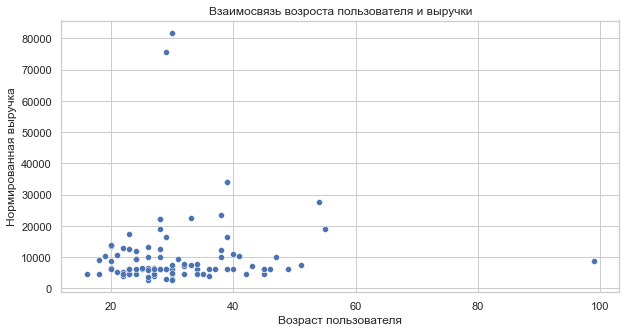

In [210]:
sns.set(style='whitegrid', rc={'figure.figsize': (10,5)})
sns.scatterplot(x = 'age', y = 'total_revenue', data = group_a2)
plt.title('Взаимосвязь возроста пользователя и выручки')  # relationship between user age and revenue
plt.xlabel('Возраст пользователя')  # user age
plt.ylabel('Нормированная выручка')  # normalized revenue

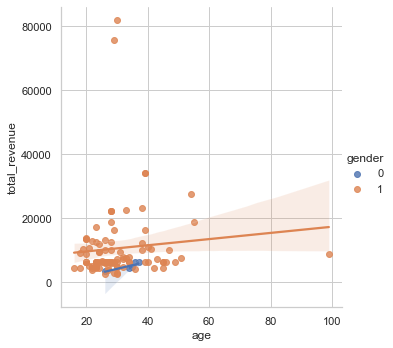

In [211]:
sns.set(style='whitegrid', rc={'figure.figsize': (10,5)})
sns.lmplot(x='age', y='total_revenue', hue='gender', data=group_a2)  # с добавлением группирующей переменной 'gender'  # with 'gender' grouping variable added

In [212]:
group_b_full.age.describe()

count    273.000000
mean      34.018315
std       14.677778
min       17.000000
25%       25.000000
50%       32.000000
75%       37.000000
max       99.000000
Name: age, dtype: float64

In [213]:
group_a1_full.age.describe()

count    377.000000
mean      30.315650
std        9.706523
min       16.000000
25%       24.000000
50%       27.000000
75%       35.000000
max       99.000000
Name: age, dtype: float64

In [214]:
group_a2_full.age.describe()

count    328.000000
mean      32.765244
std       11.600238
min       16.000000
25%       25.000000
50%       30.000000
75%       39.000000
max       99.000000
Name: age, dtype: float64

In [215]:
# Предварительное заключение: 'age' - интересный фактор влияния, особенно если разбить на возрастные подгруппы 

**Предварительное заключение**: 'age' - интересный фактор влияния, особенно если разбить на возрастные подгруппы 

**Preliminary conclusion**: *'age'* is an interesting influencer, especially when broken down into age subgroups

>

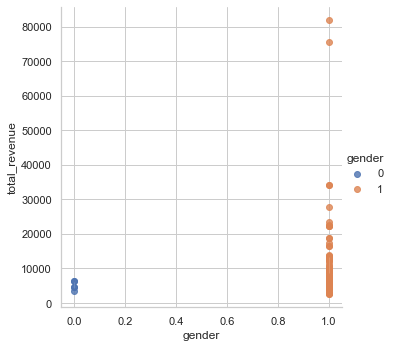

In [216]:
sns.set(style='whitegrid', rc={'figure.figsize': (10,5)})
sns.lmplot(x='gender', y='total_revenue', hue='gender', data=group_a2)

In [217]:
group_a2_full.gender.value_counts() 

1    321
0      7
Name: gender, dtype: int64

In [218]:
group_a1_full.gender.value_counts() 

1    373
0      4
Name: gender, dtype: int64

In [219]:
group_b_full.gender.value_counts() 

1    271
0      2
Name: gender, dtype: int64

In [220]:
# Предварительное заключение: представителей "gender=0" (скорее всего это женщины) очень мало, основная масса пользователей
# имеют "gender=1". Фактор "gender" не очень интересен для дальнейшего анализа.

**Предварительное заключение**: представителей "gender=0" (скорее всего это женщины) очень мало, основная масса пользователей  
имеют "gender=1". Фактор "gender" не очень интересен для дальнейшего анализа.

**Preliminary conclusion**: there are very few representatives of "gender=0" (most likely women), the majority of users
have "gender=1".  
The *'gender'* factor is not very interesting for further analysis.

>

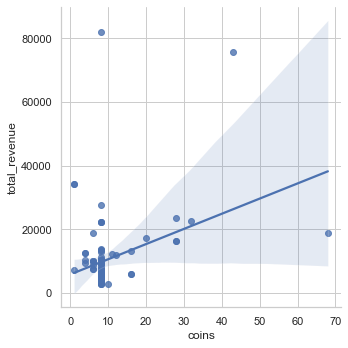

In [221]:
sns.lmplot(x='coins', y='total_revenue', data=group_a2)

In [222]:
group_b_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 272
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   uid               273 non-null    int64         
 1   age               273 non-null    int64         
 2   attraction_coeff  273 non-null    int64         
 3   coins             150 non-null    float64       
 4   country_x         273 non-null    object        
 5   visit_days        253 non-null    object        
 6   gender            273 non-null    int64         
 7   age_filter_start  273 non-null    int64         
 8   age_filter_end    273 non-null    int64         
 9   views_count       273 non-null    int64         
 10  was_premium       265 non-null    float64       
 11  is_premium        240 non-null    float64       
 12  total_revenue     273 non-null    int64         
 13  country_y         273 non-null    object        
 14  joined_at         273 non-

In [223]:
group_a1_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 376
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   uid               377 non-null    int64         
 1   age               377 non-null    int64         
 2   attraction_coeff  377 non-null    int64         
 3   coins             215 non-null    float64       
 4   country_x         377 non-null    object        
 5   visit_days        360 non-null    object        
 6   gender            377 non-null    int64         
 7   age_filter_start  377 non-null    int64         
 8   age_filter_end    377 non-null    int64         
 9   views_count       377 non-null    int64         
 10  was_premium       349 non-null    float64       
 11  is_premium        304 non-null    float64       
 12  total_revenue     377 non-null    int64         
 13  country_y         377 non-null    object        
 14  joined_at         377 non-

In [224]:
group_a2_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 327
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   uid               328 non-null    int64         
 1   age               328 non-null    int64         
 2   attraction_coeff  328 non-null    int64         
 3   coins             164 non-null    float64       
 4   country_x         328 non-null    object        
 5   visit_days        309 non-null    object        
 6   gender            328 non-null    int64         
 7   age_filter_start  328 non-null    int64         
 8   age_filter_end    328 non-null    int64         
 9   views_count       328 non-null    int64         
 10  was_premium       312 non-null    float64       
 11  is_premium        269 non-null    float64       
 12  total_revenue     328 non-null    int64         
 13  country_y         328 non-null    object        
 14  joined_at         328 non-

In [225]:

# Предварительное заключение: фактор "coins" ('внутренняя валюта') кажется в общем-то вполне приемлемым для анализа,
# но взглянув на "coins" в группах "group_A1_full", "group_A2_full", "group_B_full", видим большое количество NaN.
# Теоретически можно все пропущенные значения заполнить медианными значениями "coins" по данной группе, но как это
# скажется на результатах - не совсем понятно. Отказываемся от анализа по фактору "coins".


**Предварительное заключение**: фактор *'coins'* ('внутренняя валюта') кажется в общем-то вполне приемлемым для анализа,  
но взглянув на "coins" в группах "group_A1_full", "group_A2_full", "group_B_full", видим большое количество NaN.\
Теоретически можно все пропущенные значения заполнить медианными значениями "coins" по данной группе, но как это  
скажется на результатах - не совсем понятно. Отказываемся от анализа по фактору "coins".

**Preliminary conclusion**: the factor *'coins'* ('domestic currency') seems to be generally quite acceptable for analysis,
but looking at the "coins" in the groups "group_A1_full", "group_A2_full", "group_B_full", we see a large number of NaNs.
Theoretically, it is possible to fill in all the missing values with the median values of "coins" for this group, but how
will affect the results - it is not entirely clear. We refuse to analyze by the "coins" factor.

>

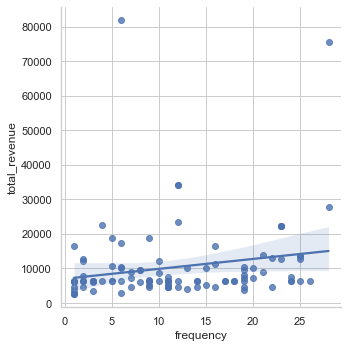

In [226]:
sns.set(style='whitegrid', rc={'figure.figsize': (10,5)})
sns.lmplot(x='frequency', y='total_revenue', data=group_a2)

In [227]:
# Предварительное заключение: фактор 'frequency' может быть интересен для дальнейшей работы.

**Предварительное заключение**: фактор *'frequency'* может быть интересен для дальнейшей работы.

**Preliminary conclusion**: the *'frequency'* factor may be of interest for further work.

>

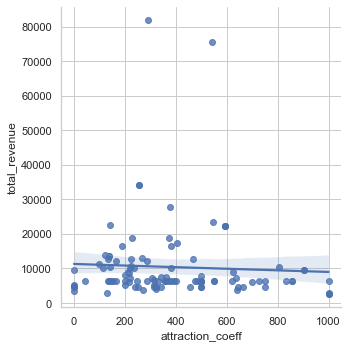

In [228]:
sns.set(style='whitegrid', rc={'figure.figsize': (10,5)})
sns.lmplot(x='attraction_coeff', y='total_revenue', data=group_a2)

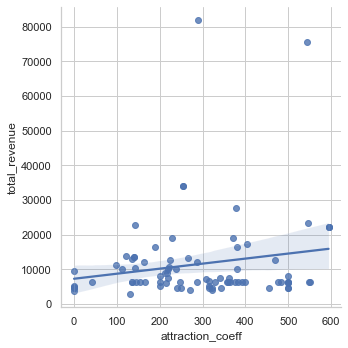

In [229]:
sns.set(style='whitegrid', rc={'figure.figsize': (10,5)})
sns.lmplot(x='attraction_coeff', y='total_revenue', data=group_a2.query('attraction_coeff <= 600'))

In [230]:
# Предварительное заключение: фактор 'attraction_coeff' может быть интересен для дальнейшей работы, если взять срез " < 600 " 

**Предварительное заключение**: фактор *'attraction_coeff'* может быть интересен для дальнейшей работы, если взять срез " < 600 " 

**Preliminary conclusion**: the *'attraction_coeff'* factor may be interesting for further work if we take the slice " < 600 "    

>

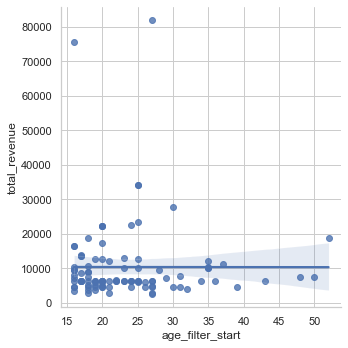

In [231]:
sns.set(style='whitegrid', rc={'figure.figsize': (10,5)})
sns.lmplot(x='age_filter_start', y='total_revenue', data=group_a2)

In [232]:
# Предварительное заключение: фактор "age_filter_start" не очень интересен для дальнейшего анализа. 

**Предварительное заключение**: фактор *'age_filter_start'* не очень интересен для дальнейшего анализа. 

**Preliminary conclusion**: *'age_filter_start'* factor is not very interesting for further analysis.

>

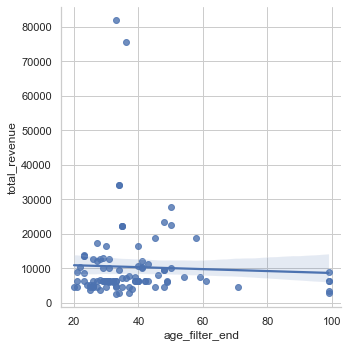

In [233]:
sns.set(style='whitegrid', rc={'figure.figsize': (10,5)})
sns.lmplot(x='age_filter_end', y='total_revenue', data=group_a2)

In [234]:
# Предварительное заключение: фактор "age_filter_end" не очень интересен для дальнейшего анализа.

**Предварительное заключение**: фактор *'age_filter_end'* не очень интересен для дальнейшего анализа.

**Preliminary conclusion**: the *'age_filter_end'* factor is not very interesting for further analysis.

>

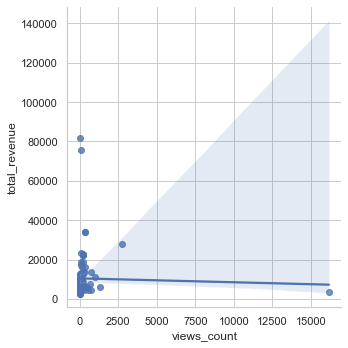

In [235]:
sns.set(style='whitegrid', rc={'figure.figsize': (10,5)})
sns.lmplot(x='views_count', y='total_revenue', data=group_a2)

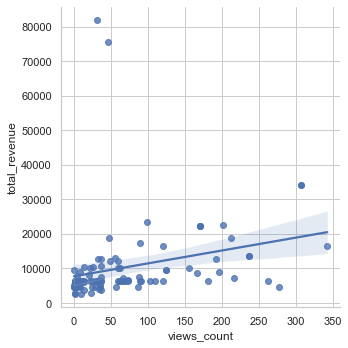

In [236]:
sns.set(style='whitegrid', rc={'figure.figsize': (10,5)})
sns.lmplot(x='views_count', y='total_revenue', data=group_a2.query('gender == 1 & views_count < 400'))

In [237]:
# Предварительное заключение: фактор 'views_count' может быть интересен для дальнейшего анализа.

**Предварительное заключение**: фактор *'views_count'* может быть интересен для дальнейшего анализа.

**Preliminary conclusion**: the *'views_count'* factor may be of interest for further analysis.

In [238]:

#  Кроме того, для дальнейшей работы может быть интересен фактор 'country_x', эффективность работы с которым была доказана выше
#  (однако остается вопрос: так для каких именно стран стоит делать нововведение?)


Кроме того, для дальнейшей работы может быть интересен фактор *'country_x'*, эффективность работы с которым была доказана выше  
(однако остается вопрос: так для каких именно стран стоит делать нововведение?)

In addition, the ***'country_x'*** factor may be of interest for further work, the efficiency of which was proved above  
(however, the question remains: so for which countries is it worth making an innovation?)

>

In [239]:

#       Попробуем получить какую-то информацию, рассматривая корреляционную связь между разными факторами.
#       Коэффициент корреляции в статистическом смысле обозначает силу и характер взаимосвязи между двумя
#  количественными переменными.
#       Посмотрим коэффициенты корреляции по Пирсону и по Спирмену. Будем ориентироваться на расчеты по Спирмену (коэфф.
#  корреляции Пирсона очень чувствителен к выбросам, асимметрии, бимодальности).
#       "По Спирмену":  можем утверждать (используя градацию шкалы Чеддока), что у фактора "total_revenue" 
#  выявлена 'умеренная' корреляционная связь с фактором "views_count" (+0.42) (т.е. число полученных оценок у пользователей),
#  а также 'слабая' корреляционная связь с фактором "frequency" (+0.28) и age (+0.12). 
#       Интересно, что корреляционная связь с фактором "frequency" проявляется и по Спирмену, и по Пирсону.  
#       Отметим, что сила и характер взаимосвязи между исследуемыми элементами еще не обязательно говорит о причинно-
#  следственной зависимости. Но корреляция МОЖЕТ означать причинно-следственную зависимость.


Попробуем получить какую-то информацию, рассматривая корреляционную связь между разными факторами.  
Коэффициент корреляции в статистическом смысле обозначает силу и характер взаимосвязи между двумя количественными переменными.  
Посмотрим коэффициенты корреляции по Пирсону и по Спирмену. Будем ориентироваться на расчеты по Спирмену (коэффициент корреляции Пирсона очень чувствителен к выбросам, асимметрии, бимодальности).

Let's try to get some information by considering the correlation between different factors.
The correlation coefficient in the statistical sense denotes the strength and nature of the relationship between two quantitative variables.
Let's look at the correlation coefficients according to Pearson and Spearman. We will focus on Spearman's calculations (Pearson's correlation coefficient is very sensitive to outliers, asymmetry, bimodality).

In [240]:
# Формируем набор независимых переменных (НЗ)  # Form a set of independent variables

cols_to_keep = ['age', 'attraction_coeff', 'coins', 'country_x', 'views_count', 'frequency', 'total_revenue']

In [241]:
df = group_a2[cols_to_keep]
df.head()

,age,attraction_coeff,coins,country_x,views_count,frequency,total_revenue
1,30,250,8.0,Chile,8,16.0,4732
4,38,112,4.0,Switzerland,62,13.0,10192
5,34,622,8.0,France,61,25.0,6292
7,29,130,10.0,Portugal,23,6.0,2964
9,26,267,16.0,Switzerland,56,22.0,13104


In [242]:
df.isnull().sum()

age                 0
attraction_coeff    0
coins               0
country_x           0
views_count         0
frequency           0
total_revenue       0
dtype: int64

In [243]:
df.dtypes

age                   int64
attraction_coeff      int64
coins               float64
country_x            object
views_count           int64
frequency           float64
total_revenue         int64
dtype: object

In [244]:
df.corr()  # по Пирсону  # by Pearson

,age,attraction_coeff,coins,views_count,frequency,total_revenue
age,1.000000,-0.075163,0.146585,0.018831,0.111475,0.084863
attraction_coeff,-0.075163,1.000000,-0.001156,-0.177710,-0.245521,-0.051075
coins,0.146585,-0.001156,1.000000,-0.019673,-0.082641,0.341583
views_count,0.018831,-0.177710,-0.019673,1.000000,-0.063317,-0.027824
frequency,0.111475,-0.245521,-0.082641,-0.063317,1.000000,0.194704
total_revenue,0.084863,-0.051075,0.341583,-0.027824,0.194704,1.000000


In [245]:
df.corr()['total_revenue'].sort_values(ascending=False).round(2)

total_revenue       1.00
coins               0.34
frequency           0.19
age                 0.08
views_count        -0.03
attraction_coeff   -0.05
Name: total_revenue, dtype: float64

In [246]:
df.corr(method='spearman')  # по Спирмену  # according to Spearman

,age,attraction_coeff,coins,views_count,frequency,total_revenue
age,1.000000,0.011545,-0.049351,0.359888,0.039293,0.118095
attraction_coeff,0.011545,1.000000,0.055234,-0.196453,-0.212888,-0.129464
coins,-0.049351,0.055234,1.000000,-0.011183,-0.237377,-0.032003
views_count,0.359888,-0.196453,-0.011183,1.000000,0.271251,0.424322
frequency,0.039293,-0.212888,-0.237377,0.271251,1.000000,0.278553
total_revenue,0.118095,-0.129464,-0.032003,0.424322,0.278553,1.000000


In [247]:
df.corr(method='spearman')['total_revenue'].sort_values(ascending=False).round(2)

total_revenue       1.00
views_count         0.42
frequency           0.28
age                 0.12
coins              -0.03
attraction_coeff   -0.13
Name: total_revenue, dtype: float64

In [248]:

#       "По Спирмену":  можем утверждать (используя градацию шкалы Чеддока), что у фактора "total_revenue" 
#  выявлена 'умеренная' корреляционная связь с фактором "views_count" (+0.42) (т.е. число полученных оценок у пользователей),
#  а также 'слабая' корреляционная связь с фактором "frequency" (+0.28) и age (+0.12). 
#       Интересно, что корреляционная связь с фактором "frequency" проявляется и по Спирмену, и по Пирсону.  
#       Отметим, что сила и характер взаимосвязи между исследуемыми элементами еще не обязательно говорит о причинно-
#  следственной зависимости. Но корреляция МОЖЕТ означать причинно-следственную зависимость.


Итак, рассматривая корреляцию "по Спирмену", можем утверждать (используя градацию шкалы Чеддока), что у фактора "total_revenue" выявлена 'умеренная' корреляционная связь с фактором "views_count" (+0.42) (т.е. число полученных оценок у пользователей),
а также 'слабая' корреляционная связь с фактором "frequency" (+0.28) и age (+0.12).  
Интересно, что корреляционная связь с фактором "frequency" проявляется и по Спирмену, и по Пирсону.  
Отметим, что сила и характер взаимосвязи между исследуемыми элементами еще не обязательно говорит о причинно-следственной зависимости. Но корреляция МОЖЕТ означать причинно-следственную зависимость.

So, considering the correlation "according to Spearman", we can state (using the gradation of the Chaddock scale) that the factor "total_revenue" has a 'moderate' correlation with the factor "views_count" (+0.42) (i.e. the number of received ratings from users) , as well as a 'weak' correlation with the factor "frequency" (+0.28) and age (+0.12).  
It is interesting that the correlation with the "frequency" factor appears both according to Spearman and Pearson.  
Note that the strength and nature of the relationship between the studied elements does not necessarily indicate a causal relationship. But correlation CAN mean causation.

In [249]:
#                                       3.2. Основной блок аналитики

####                                       3.2. Основной блок аналитики

####                                   3.2. The main block of analytics

In [250]:
#                                 3.2.1. Фактор "age" (возраст пользователей)

####                                      _3.2.1. Фактор "age" (возраст пользователей)_

#### _3.2.1. Factor "age" (age of users)_

In [251]:
# Распределим всех пользователей по возрастным группам  # Distribute all users by age groups

cut_labels = ['16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-99']
cut_bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 99]

group_b_full = group_b_full.assign(age_diff = pd.cut(group_b_full['age'], bins=cut_bins, labels=cut_labels))
group_a1_full = group_a1_full.assign(age_diff = pd.cut(group_a1_full['age'], bins=cut_bins, labels=cut_labels))
group_a2_full = group_a2_full.assign(age_diff = pd.cut(group_a2_full['age'], bins=cut_bins, labels=cut_labels))

In [252]:
group_b_full['group'] = 'B'
group_a1_full['group'] = 'A'
group_a2_full['group'] = 'A'       

In [253]:
all_groups = pd.concat([group_b_full, group_a1_full, group_a2_full], ignore_index=True, verify_integrity=True)

In [254]:
(all_groups.country_x == all_groups.country_y).unique()

array([ True])

In [255]:
all_groups = all_groups.drop(['country_y'], axis=1)  # убираем дубликат колонки "country_x"  # remove the duplicate column "country_x"

In [256]:
all_groups.head()

,uid,age,attraction_coeff,coins,country_x,visit_days,gender,age_filter_start,age_filter_end,views_count,...,is_premium,total_revenue,joined_at,paid_at,revenue,payment_id,from_page,product_type,age_diff,group
0,891345942,52,209,NaN,Italy,"1,2,3,4,5,6,8,10",1,49,55,43,...,1.0,12909,2017-05-11 13:00:00,2017-11-13 15:04:00,12909.0,147.0,trial_vip_popup,trial_premium,51-55,B
1,892054251,37,390,NaN,United States of America,"1,2,3,4,6,7",1,34,40,64,...,1.0,13923,2017-10-22 00:33:00,2017-10-30 01:37:00,13923.0,147.0,trial_vip_popup,trial_premium,36-40,B
2,892236423,23,262,378.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,19,23,1326,...,1.0,95823,2017-10-18 01:09:00,2017-10-23 00:15:00,3783.0,67.0,menu,other_type,21-25,B
3,892236423,23,262,378.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,19,23,1326,...,1.0,95823,2017-10-18 01:09:00,2017-10-27 22:38:00,3783.0,67.0,menu,other_type,21-25,B
4,892168170,29,406,4.0,United States of America,"1,2,4,5,6,7,8,9,10,13,15,16,17,18,19,20,22,23,...",1,26,32,86,...,1.0,15392,2017-10-19 17:10:00,2017-10-27 19:10:00,9087.0,147.0,trial_vip_popup,trial_premium,26-30,B


In [257]:
work_with_age = pd.DataFrame(columns=['group_test', 'group_control', 'age_diff', 'p_alpha', 'p_value', 'result'])

answer = ["Отвергаем гипотезу H(0)", "Не можем отвергнуть гипотезу H(0)"]  # "We reject the hypothesis H(0)", "We cannot reject the hypothesis H(0)"

for i in all_groups['age_diff'].unique():
    
    s1 = all_groups.query('group == "B" & age_diff in @i')['total_revenue']
    s2 = all_groups.query('group != "B" & age_diff in @i')['total_revenue']
    
    p_value_result = mannwhitneyu(s1, s2)[1]
    
    new_row = {'group_test': 'B',
               'group_control': 'A',
               'age_diff': i,
               'p_alpha': 0.05 / ((len(cut_labels) * (len(cut_labels)-1)) / 2),  # we would do it using Bonferroni correction
               'p_value': p_value_result,
               'result': answer[p_value_result >= (0.05 / ((len(cut_labels) * (len(cut_labels)-1)) / 2))]}
    
    work_with_age = work_with_age.append([new_row])

work_with_age

C:\Users\user\AppData\Local\Temp\ipykernel_8976\511157008.py:17: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'result': answer[p_value_result >= (0.05 / ((len(cut_labels) * (len(cut_labels)-1)) / 2))]}
C:\Users\user\AppData\Local\Temp\ipykernel_8976\511157008.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  work_with_age = work_with_age.append([new_row])
C:\Users\user\AppData\Local\Temp\ipykernel_8976\511157008.py:17: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'result': answer[p_value_result >= (0.05 / ((len(cut_labels) * (len(cut_labels)-1)) / 2))]}
C:\Users\user\AppData\Local\Temp\ipykernel_8976\511157008.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  work_with_age = work_with_

,group_test,group_control,age_diff,p_alpha,p_value,result
0,B,A,51-55,0.001389,0.084553,Не можем отвергнуть гипотезу H(0)
0,B,A,36-40,0.001389,0.576214,Не можем отвергнуть гипотезу H(0)
0,B,A,21-25,0.001389,0.02747,Не можем отвергнуть гипотезу H(0)
0,B,A,26-30,0.001389,0.006689,Не можем отвергнуть гипотезу H(0)
0,B,A,46-50,0.001389,0.980849,Не можем отвергнуть гипотезу H(0)
0,B,A,31-35,0.001389,0.05415,Не можем отвергнуть гипотезу H(0)
0,B,A,41-45,0.001389,0.339574,Не можем отвергнуть гипотезу H(0)
0,B,A,16-20,0.001389,0.001314,Отвергаем гипотезу H(0)
0,B,A,56-99,0.001389,0.000117,Отвергаем гипотезу H(0)


In [258]:

#    Вывод: отвергнута гипотеза H(0) в отношении групп пользователей 16-20 лет, 56-99 лет (фактор "age"), что позволяет нам  
# говорить о статистически значимых различиях между тестовой группой В и контрольной A1+A2 по метрике 'total_revenue' (у 
# пользователей 16-20, 56-99 лет).


**Вывод**: отвергнута гипотеза H(0) в отношении групп пользователей 16-20 лет, 56-99 лет (фактор "age"), что позволяет нам говорить о статистически значимых различиях между тестовой группой В и контрольной A1+A2 по метрике 'total_revenue' (у 
пользователей 16-20, 56-99 лет).

**Conclusion**: the hypothesis H(0) was rejected in relation to user groups 16-20 years old, 56-99 years old ("age" factor), which allows us to talk about statistically significant differences between test group B and control group A1 + A2 in terms of the 'total_revenue' metric (for users 16-20, 56-99 years old).

>

In [259]:
#                                     3.2.2. Фактор "country" (страна пользователя)

####                                    _3.2.2. Фактор "country" (страна пользователя)_

####                                  _3.2.2. Factor "country" (user's country)_

In [260]:
group_b.country_x.unique()  # будем ориентироваться на список стран из тестовой (экспериментальной) группы "В"  # we will focus on the list of countries from the test (experimental) group "B"

array(['United States of America', 'Canada', 'Spain', 'Italy',
       'United Kingdom (Great Britain)', 'France', 'United Arab Emirates',
       'Chile', 'Australia', 'Israel', 'Argentina', 'Mexico', 'Germany',
       'Turkey', 'Latvia', 'Belgium'], dtype=object)

In [261]:
group_b.country_x.nunique()

16

In [262]:
all_groups.query('group == "B" & product_type == "premium_no_trial"').country_x.unique()  # хорошо, то же самое что в группе "В"  # ok, same as group "B"

array(['United States of America', 'Canada', 'Spain', 'Italy',
       'United Kingdom (Great Britain)', 'France', 'United Arab Emirates',
       'Chile', 'Australia', 'Israel', 'Argentina', 'Mexico', 'Germany',
       'Turkey', 'Latvia', 'Belgium'], dtype=object)

In [263]:
all_groups.query('group != "B" & product_type == "premium_no_trial"').country_x.unique()

array(['India', 'Chile', 'Switzerland', 'United States of America',
       'Argentina', 'Italy', 'Australia', 'France', 'Turkey', 'Spain',
       'United Kingdom (Great Britain)', 'Israel', 'United Arab Emirates',
       'Canada', 'Portugal', 'Germany', 'Belgium', 'Ukraine', 'Austria'],
      dtype=object)

In [264]:
all_groups.country_x.isin(['United States of America', 'Canada', 'Spain', 'Latvia', 'Italy',
       'United Kingdom (Great Britain)', 'France', 'Argentina',
       'United Arab Emirates', 'Chile', 'Israel', 'Australia', 'Mexico',
       'Germany', 'Turkey', 'Belgium']).value_counts()

True     938
False     40
Name: country_x, dtype: int64

In [265]:
new_list = all_groups.country_x.isin(['United States of America', 'Canada', 'Spain', 'Latvia', 'Italy',
       'United Kingdom (Great Britain)', 'France', 'Argentina',
       'United Arab Emirates', 'Chile', 'Israel', 'Australia', 'Mexico',
       'Germany', 'Turkey', 'Belgium'])

In [266]:
all_groups_0 = all_groups[new_list]
all_groups_0.head() 

,uid,age,attraction_coeff,coins,country_x,visit_days,gender,age_filter_start,age_filter_end,views_count,...,is_premium,total_revenue,joined_at,paid_at,revenue,payment_id,from_page,product_type,age_diff,group
0,891345942,52,209,NaN,Italy,"1,2,3,4,5,6,8,10",1,49,55,43,...,1.0,12909,2017-05-11 13:00:00,2017-11-13 15:04:00,12909.0,147.0,trial_vip_popup,trial_premium,51-55,B
1,892054251,37,390,NaN,United States of America,"1,2,3,4,6,7",1,34,40,64,...,1.0,13923,2017-10-22 00:33:00,2017-10-30 01:37:00,13923.0,147.0,trial_vip_popup,trial_premium,36-40,B
2,892236423,23,262,378.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,19,23,1326,...,1.0,95823,2017-10-18 01:09:00,2017-10-23 00:15:00,3783.0,67.0,menu,other_type,21-25,B
3,892236423,23,262,378.0,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...",1,19,23,1326,...,1.0,95823,2017-10-18 01:09:00,2017-10-27 22:38:00,3783.0,67.0,menu,other_type,21-25,B
4,892168170,29,406,4.0,United States of America,"1,2,4,5,6,7,8,9,10,13,15,16,17,18,19,20,22,23,...",1,26,32,86,...,1.0,15392,2017-10-19 17:10:00,2017-10-27 19:10:00,9087.0,147.0,trial_vip_popup,trial_premium,26-30,B


In [267]:
group_b.country_x.value_counts()

United States of America          20
Italy                              8
Spain                              6
France                             6
United Arab Emirates               6
Chile                              6
United Kingdom (Great Britain)     5
Canada                             4
Argentina                          4
Israel                             2
Germany                            2
Australia                          1
Mexico                             1
Turkey                             1
Latvia                             1
Belgium                            1
Name: country_x, dtype: int64

In [268]:
# Исключим из списка стран также те, от которых только по 1 представителю - вряд ли корректно делать выводы на основе 1 наблюдения
# We also exclude from the list of countries those from which only 1 representative each - it is hardly correct to draw conclusions based on 1 observation

all_groups_0 = all_groups_0.query('country_x != "Latvia" & country_x != "Australia" & country_x != "Mexico" & country_x != "Turkey" & country_x != "Belgium"')

In [269]:
work_with_country = pd.DataFrame(columns=['group_test', 'group_control', 'country', 'p_alpha', 'p_value', 'result'])

answer = ["Отвергаем гипотезу H(0)", "Не можем отвергнуть гипотезу H(0)"]  # "We reject the hypothesis H(0)", "We cannot reject the hypothesis H(0)"

for i in all_groups_0['country_x'].unique():
    
    s1 = all_groups_0.query('group == "B" & country_x in @i & product_type == "premium_no_trial"')['total_revenue']
    s2 = all_groups_0.query('group != "B" & country_x in @i & product_type == "premium_no_trial"')['total_revenue']
    
    p_value_result = mannwhitneyu(s1, s2)[1]
    
    new_row = {'group_test': 'B',
               'group_control': 'A',
               'country': i,
               'p_alpha': 0.05 / group_b.country_x.nunique(),  # we would do it using Bonferroni correction
               'p_value': p_value_result,
               'result': answer[p_value_result >= (0.05 / group_b.country_x.nunique())]}
    
    work_with_country = work_with_country.append([new_row])

work_with_country

C:\Users\user\AppData\Local\Temp\ipykernel_8976\1713408983.py:17: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'result': answer[p_value_result >= (0.05 / group_b.country_x.nunique())]}
C:\Users\user\AppData\Local\Temp\ipykernel_8976\1713408983.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  work_with_country = work_with_country.append([new_row])
C:\Users\user\AppData\Local\Temp\ipykernel_8976\1713408983.py:17: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'result': answer[p_value_result >= (0.05 / group_b.country_x.nunique())]}
C:\Users\user\AppData\Local\Temp\ipykernel_8976\1713408983.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  work_with_country = work_with_country.append([new_

,group_test,group_control,country,p_alpha,p_value,result
0,B,A,Italy,0.003125,0.769841,Не можем отвергнуть гипотезу H(0)
0,B,A,United States of America,0.003125,0.001251,Отвергаем гипотезу H(0)
0,B,A,Canada,0.003125,0.216801,Не можем отвергнуть гипотезу H(0)
0,B,A,Spain,0.003125,0.73844,Не можем отвергнуть гипотезу H(0)
0,B,A,United Arab Emirates,0.003125,0.480267,Не можем отвергнуть гипотезу H(0)
0,B,A,Argentina,0.003125,0.672533,Не можем отвергнуть гипотезу H(0)
0,B,A,France,0.003125,0.015099,Не можем отвергнуть гипотезу H(0)
0,B,A,United Kingdom (Great Britain),0.003125,0.43053,Не можем отвергнуть гипотезу H(0)
0,B,A,Israel,0.003125,0.031767,Не можем отвергнуть гипотезу H(0)
0,B,A,Germany,0.003125,0.375767,Не можем отвергнуть гипотезу H(0)


In [270]:

#    Вывод: отвергнута гипотеза H(0) в отношении группы пользователей из страны "United States of America" (фактор "country"),
# что позволяет нам говорить о статистически значимых различиях (по метрике 'total_revenue') между пользователями из 
# тестовой группы В и контрольной A1+A2 (из страны "United States of America").


**Вывод**: отвергнута гипотеза H(0) в отношении группы пользователей из страны "United States of America" (фактор "country"),  
что позволяет нам говорить о статистически значимых различиях (по метрике 'total_revenue') между пользователями из  
тестовой группы В и контрольной A1+A2 (из страны "United States of America").

**Conclusion**: Hypothesis H(0) was rejected for a group of users from the country "United States of America" ("country" factor),  
which allows us to talk about statistically significant differences (according to the 'total_revenue' metric) between  
users from test group B and control group A1+A2 (from the country "United States of America").

>

In [271]:

# Далее прибегнем к ANOVA. Дисперсии внутри наших групп должны быть примерно одинаковы, проверим это с помощью критерия Левена. 
# Видим, что p>0.05, гипотезу H(0) отклонить не можем, дисперсия гомогенна в каждой из групп.
# Размеры выборок достаточно велики (рассматриваем все типы подписки), применение дисперсионного анализа возможно. 


Далее прибегнем к ANOVA. Дисперсии внутри наших групп должны быть примерно одинаковы, проверим это с помощью критерия Левена.  
Видим, что p>0.05, гипотезу H(0) отклонить не можем, дисперсия гомогенна в каждой из групп.  
Размеры выборок достаточно велики (рассматриваем все типы подписки), применение дисперсионного анализа возможно. 

Next, we will resort to ANOVA. The variances within our groups should be approximately the same, we will check this using the Levene test.  
We see that p>0.05, we cannot reject the hypothesis H(0), the dispersion is homogeneous in each of the groups.  
The sample sizes are quite large (we consider all types of subscription), the use of ANOVA is possible.

In [272]:
k = all_groups.query('group == "A"').total_revenue
l = all_groups.query('group == "B"').total_revenue

In [273]:
stats.levene(k, l)

LeveneResult(statistic=3.7812031130429204, pvalue=0.05211836495063842)

>

In [274]:
#                                      3.2.3. Фактор "views_count" (число полученных оценок)

####                                   _3.2.3. Фактор "views_count" (число полученных оценок)_

####                                  _3.2.3. Factor "views_count" (number of views received)_

In [275]:
all_groups_1 = all_groups.query('gender == 1 & views_count < 400')

In [276]:
all_groups_1.views_count.quantile(q=[.33, .66])

0.33     32.0
0.66    112.0
Name: views_count, dtype: float64

In [277]:
all_groups_1.views_count.describe()

count    829.000000
mean      94.067551
std       88.761229
min        0.000000
25%       21.000000
50%       63.000000
75%      150.000000
max      364.000000
Name: views_count, dtype: float64

In [278]:
all_groups_1.groupby(['group', 'views_count'], as_index=False).agg({'total_revenue': 'mean'})

,group,views_count,total_revenue
0,A,0,7209.647059
1,A,1,9725.444444
2,A,2,8928.523810
3,A,3,8784.750000
4,A,4,13879.125000
...,...,...,...
232,B,251,30459.000000
233,B,263,17758.000000
234,B,269,3835.000000
235,B,287,129870.000000


In [279]:
df_1 = all_groups_1.groupby(['group', 'views_count'], as_index=False).agg({'total_revenue': 'mean'})

In [280]:
cut_labels_1 = ['0-32', '33-112', '113-364']
cut_bins_1 = [-1, 32, 112, 364]

df_1 = df_1.assign(views_count_diff = pd.cut(df_1['views_count'], bins=cut_bins_1, labels=cut_labels_1))

In [281]:
formula = 'total_revenue ~ group + views_count_diff + group:views_count_diff'
model = ols(formula, df_1).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                              sum_sq     df         F    PR(>F)
group                   1.739626e+09    1.0  9.428346  0.002392
views_count_diff        2.550118e+09    2.0  6.910508  0.001217
group:views_count_diff  6.131248e+08    2.0  1.661493  0.192116
Residual                4.262185e+10  231.0       NaN       NaN


In [282]:
# Как видим, эффект от влияния обоих факторов на ЗП ('total_revenue') является статистически значимым (в отличии от их взаимодействия)

Как видим, эффект от влияния обоих факторов на ЗП ('total_revenue') является статистически значимым (в отличии от их взаимодействия)

As you can see, the effect of the influence of both factors on the salary ('total_revenue') is statistically significant (unlike their interaction)

In [283]:
df_1.views_count_diff = df_1.views_count_diff.astype(object)

In [284]:
df_1['combination'] = df_1['group'] + ' \ ' + df_1['views_count_diff'] 

In [285]:
print(pairwise_tukeyhsd(df_1['total_revenue'], groups=df_1['combination']).summary())

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
   group1      group2    meandiff  p-adj     lower      upper    reject
-----------------------------------------------------------------------
   A \ 0-32 A \ 113-364  4888.0066 0.5731  -3678.6324 13454.6457  False
   A \ 0-32  A \ 33-112   1808.236 0.9905  -6758.4031  10374.875  False
   A \ 0-32    B \ 0-32  2084.6633 0.9927  -8387.6177 12556.9443  False
   A \ 0-32 B \ 113-364 14473.7228 0.0002   5127.0371 23820.4085   True
   A \ 0-32  B \ 33-112  5313.6041 0.6231  -4450.1902 15077.3983  False
A \ 113-364  A \ 33-112 -3079.7706 0.8367 -10456.9006  4297.3593  False
A \ 113-364    B \ 0-32 -2803.3433 0.9585 -12327.1771  6720.4905  False
A \ 113-364 B \ 113-364  9585.7162 0.0128   1315.5726 17855.8597   True
A \ 113-364  B \ 33-112   425.5975    1.0  -8313.1908  9164.3857  False
 A \ 33-112    B \ 0-32   276.4273    1.0  -9247.4065  9800.2611  False
 A \ 33-112 B \ 113-364 12665.4868 0.0002   4395.3433 20935.6304

In [286]:

# ВЫВОД: видим, что гипотезы H(0) были отклонены при сравнении средних значений в парах A\0-32 и B\113-364,
# A\113-364 и B\113-364, A\33-112 и B\113-364, A\33-112 и B\113-364, B\0-32 и B\113-364, что позволяет нам говорить о
# статистически значимых различиях (по метрике 'total_revenue') между пользователями из тестовой группы В и
# контрольной A1+A2 (показатели статистически значимо увеличились).   


**ВЫВОД**: видим, что гипотезы H(0) были отклонены при сравнении средних значений в парах A\0-32 и B\113-364, A\113-364 и B\113-364,  
A\33-112 и B\113-364, A\33-112 и B\113-364, B\0-32 и B\113-364, что позволяет нам говорить о статистически значимых различиях  
(по метрике 'total_revenue') между пользователями из тестовой группы В и контрольной A1+A2 (показатели статистически значимо увеличились).   

**CONCLUSION**: we see that the hypotheses H(0) were rejected when comparing the means in pairs A\0-32 and B\113-364, A\113-364 and B\113-364,
A\33-112 and B\113-364, A\33-112 and B\113-364, B\0-32 and B\113-364, which allows us to talk about statistically significant differences
(according to the 'total_revenue' metric) between users from test group B and control group A1+A2 (indicators increased statistically significantly).

In [287]:
# Проверим, что получим при использовании непараметрических тестов (Kruskal-Wallis Test)  # Check what we get when using non-parametric tests (Kruskal-Wallis Test)

data1 = df_1.query('group == "A" & views_count_diff == "0-32"').total_revenue 
data2 = df_1.query('group == "A" & views_count_diff == "33-112"').total_revenue
data3 = df_1.query('group == "A" & views_count_diff == "113-364"').total_revenue

data4 = df_1.query('group == "B" & views_count_diff == "0-32"').total_revenue 
data5 = df_1.query('group == "B" & views_count_diff == "33-112"').total_revenue
data6 = df_1.query('group == "B" & views_count_diff == "113-364"').total_revenue

In [288]:
stat, p = kruskal(data1, data2, data3, data4, data5, data6)
print('Statistics=%.3f, p=%.3f' % (stat, p))  # отвергли гипотезу H(0)  # rejected hypothesis H(0)

Statistics=21.067, p=0.001


In [289]:
data = [data1, data2, data3, data4, data5, data6]

sp.posthoc_dunn(data, p_adjust = 'bonferroni') #  perform Dunn's test using a Bonferonni correction for the p-values

,1,2,3,4,5,6
1,1.000000,1.000000,0.503727,1.000000,0.081308,0.000710
2,1.000000,1.000000,1.000000,1.000000,0.674851,0.008953
3,0.503727,1.000000,1.000000,1.000000,1.000000,0.248219
4,1.000000,1.000000,1.000000,1.000000,1.000000,0.499994
5,0.081308,0.674851,1.000000,1.000000,1.000000,1.000000
6,0.000710,0.008953,0.248219,0.499994,1.000000,1.000000


In [290]:
sp.posthoc_dunn(data, p_adjust = 'holm') #  perform Dunn's test using a Holm correction for the p-values

,1,2,3,4,5,6
1,1.000000,1.000000,0.366662,0.965402,0.070467,0.000710
2,1.000000,1.000000,1.000000,1.000000,0.404910,0.008357
3,0.366662,1.000000,1.000000,1.000000,1.000000,0.198576
4,0.965402,1.000000,1.000000,1.000000,1.000000,0.366662
5,0.070467,0.404910,1.000000,1.000000,1.000000,1.000000
6,0.000710,0.008357,0.198576,0.366662,1.000000,1.000000


In [291]:

# ВЫВОД: видим, что при использовании непараметрических Kruskal-Wallis test и Dunn test, гипотезы H(0) были отклонены при
# сравнении значений в парах A\0-32 и B\113-364, A\33-112 и B\113-364, что позволяет нам говорить о статистически значимых
# различиях (по метрике 'total_revenue') между пользователями из тестовой группы В и контрольной A1+A2. 

# Интресно, что и с поправкой Бонферрони, и с более "мягкой" поправкой Холма получаем одинаковые конечные результаты.

# Принимаем решение в конечных выводах опираться на "непараметрику" (учитывая более строгий характер поправки Бонферрони;
# учитывая характеристики исходных групп). 


**ВЫВОД**: видим, что при использовании непараметрических Kruskal-Wallis test и Dunn test, гипотезы H(0) были отклонены при
сравнении значений в парах A\0-32 и B\113-364, A\33-112 и B\113-364, что позволяет нам говорить о статистически значимых
различиях (по метрике 'total_revenue') между пользователями из тестовой группы В и контрольной A1+A2. 

Интресно, что и с поправкой Бонферрони, и с более "мягкой" поправкой Холма получаем одинаковые конечные результаты.

Принимаем решение в конечных выводах опираться на "непараметрику" (учитывая более строгий характер поправки Бонферрони;
учитывая характеристики исходных групп). 

**CONCLUSION**: we see that when using the nonparametric Kruskal-Wallis test and Dunn test, the hypotheses H(0) were rejected when comparing the values in the pairs A\0-32 and B\113-364, A\33-112 and B\113- 364, which allows us to talk about statistically significant differences (according to the 'total_revenue' metric) between users from test group B and control group A1+A2.

Interestingly, both with the Bonferroni correction and with the "softer" Holm correction, we get the same final results.

We make a decision in the final conclusions to rely on "non-parametrics" (taking into account the more stringent nature of the Bonferroni correction; taking into account the characteristics of the original groups).

>

In [292]:
#                                   3.2.4. Фактор "attraction_coeff" (коэффициент привлекательности)

####                                _3.2.4. Фактор "attraction_coeff" (коэффициент привлекательности)_

####                                            _3.2.4. Фактор "attraction_coeff" (коэффициент привлекательности)_

In [293]:
all_groups_2 = all_groups.query('attraction_coeff < 600')

In [294]:
all_groups_2.attraction_coeff.quantile([.33, .66])

0.33    199.08
0.66    328.16
Name: attraction_coeff, dtype: float64

In [295]:
all_groups_2.attraction_coeff.describe()

count    877.000000
mean     273.316990
std      148.372025
min        0.000000
25%      175.000000
50%      261.000000
75%      376.000000
max      594.000000
Name: attraction_coeff, dtype: float64

In [296]:
all_groups_2.groupby(['group', 'attraction_coeff'], as_index=False).agg({'total_revenue': 'mean'})

,group,attraction_coeff,total_revenue
0,A,0,8401.872340
1,A,4,26.000000
2,A,37,10075.000000
3,A,41,11102.000000
4,A,43,10439.000000
...,...,...,...
287,B,541,4719.000000
288,B,547,27404.000000
289,B,552,25207.000000
290,B,555,14352.000000


In [297]:
df_2 = all_groups_2.groupby(['group', 'attraction_coeff'], as_index=False).agg({'total_revenue': 'mean'})

In [298]:
cut_labels_2 = ['0-199', '200-328', '329-594']
cut_bins_2 = [-1, 199, 328, 594]

df_2 = df_2.assign(attraction_coeff_diff = pd.cut(df_2['attraction_coeff'], bins=cut_bins_2, labels=cut_labels_2))

In [299]:
formula = 'total_revenue ~ group + attraction_coeff_diff + group:attraction_coeff_diff'

model = ols(formula, df_2).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                                   sum_sq     df         F    PR(>F)
group                        1.223206e+09    1.0  1.225194  0.269274
attraction_coeff_diff        2.302750e+09    2.0  1.153247  0.317074
group:attraction_coeff_diff  3.824222e+09    2.0  1.915219  0.149194
Residual                     2.855359e+11  286.0       NaN       NaN


In [300]:

# Итак, видим, эффект от влияния обоих факторов на ЗП ('total_revenue') статистически незначим (как и их взаимодействие).
# Проверим, что получим при использовании непараметрических тестов (Kruskal-Wallis Test)


Итак, видим, эффект от влияния обоих факторов на ЗП ('total_revenue') статистически незначим (как и их взаимодействие).  
Проверим, что получим при использовании непараметрических тестов (Kruskal-Wallis Test)

So, we see that the effect of the influence of both factors on the dependent variable ('total_revenue') is statistically insignificant (as well as their interaction).
Let's check what we get when using non-parametric tests (Kruskal-Wallis Test)

In [301]:
data_1 = df_2.query('group == "A" & attraction_coeff_diff == "0-199"').total_revenue 
data_2 = df_2.query('group == "A" & attraction_coeff_diff == "200-328"').total_revenue
data_3 = df_2.query('group == "A" & attraction_coeff_diff == "329-594"').total_revenue

data_4 = df_2.query('group == "B" & attraction_coeff_diff == "0-199"').total_revenue 
data_5 = df_2.query('group == "B" & attraction_coeff_diff == "200-328"').total_revenue
data_6 = df_2.query('group == "B" & attraction_coeff_diff == "329-594"').total_revenue

In [302]:
stat, p = kruskal(data_1, data_2, data_3, data_4, data_5, data_6)
print('Statistics=%.3f, p=%.3f' % (stat, p))  # отвергли гипотезу H(0)  # rejected hypothesis H(0)

Statistics=18.410, p=0.002


In [303]:
data_att_coef = [data_1, data_2, data_3, data_4, data_5, data_6]

sp.posthoc_dunn(data_att_coef, p_adjust = 'bonferroni')  # perform Dunn's test using a Bonferonni correction for the p-values

,1,2,3,4,5,6
1,1.000000,1.000000,1.000000,0.782614,0.071756,1.00000
2,1.000000,1.000000,1.000000,0.366086,0.021985,1.00000
3,1.000000,1.000000,1.000000,0.131010,0.005218,1.00000
4,0.782614,0.366086,0.131010,1.000000,1.000000,1.00000
5,0.071756,0.021985,0.005218,1.000000,1.000000,0.56119
6,1.000000,1.000000,1.000000,1.000000,0.561190,1.00000


In [304]:
sp.posthoc_dunn(data_att_coef, p_adjust = 'holm')  # perform Dunn's test using a Holm correction for the p-values

,1,2,3,4,5,6
1,1.000000,1.000000,1.000000,0.469568,0.062188,1.000000
2,1.000000,1.000000,1.000000,0.268463,0.020519,1.000000
3,1.000000,1.000000,1.000000,0.104808,0.005218,1.000000
4,0.469568,0.268463,0.104808,1.000000,1.000000,1.000000
5,0.062188,0.020519,0.005218,1.000000,1.000000,0.374126
6,1.000000,1.000000,1.000000,1.000000,0.374126,1.000000


In [305]:

# ВЫВОД: видим, что при использовании непараметрических Kruskal-Wallis test и Dunn test, гипотезы H(0) были отклонены при
# сравнении значений в парах A\200-328 и B\200-328, A\329-594 и B\200-328, что позволяет нам говорить о статистически значимых
# различиях (по метрике 'total_revenue') между пользователями из тестовой группы В и контрольной A1+A2. 

# И с поправкой Бонферрони, и с более "мягкой" поправкой Холма получаем одинаковые конечные результаты.

# Принимаем решение в конечных выводах опираться на "непараметрику" (учитывая более строгий характер поправки Бонферрони;
# учитывая характеристики исходных групп). 


**ВЫВОД**: видим, что при использовании непараметрических Kruskal-Wallis test и Dunn test, гипотезы H(0) были отклонены при
сравнении значений в парах A\200-328 и B\200-328, A\329-594 и B\200-328, что позволяет нам говорить о статистически значимых
различиях (по метрике 'total_revenue') между пользователями из тестовой группы В и контрольной A1+A2. 

И с поправкой Бонферрони, и с более "мягкой" поправкой Холма получаем одинаковые конечные результаты.

Принимаем решение в конечных выводах опираться на "непараметрику" (учитывая более строгий характер поправки Бонферрони;
учитывая характеристики исходных групп). 

**CONCLUSION**: we see that when using the nonparametric Kruskal-Wallis test and Dunn test, the hypotheses H(0) were rejected when comparing the values in the pairs A\200-328 and B\200-328, A\329-594 and B\200- 328, which allows us to talk about statistically significant differences (according to the 'total_revenue' metric) between users from test group B and control group A1+A2.

Both with the Bonferroni correction and with the "softer" Holm correction, we get the same final results.

We make a decision in the final conclusions to rely on "non-parametrics" (taking into account the more stringent nature of the Bonferroni correction; taking into account the characteristics of the original groups).

>

In [306]:
#                               3.2.5. Фактор "frequency" (частота посещений сайта)

####                               _3.2.5. Фактор "frequency" (частота посещений сайта)_

####                              _3.2.5. Фактор "frequency" (частота посещений сайта)_

In [307]:
all_groups['frequency'] = (all_groups['visit_days'].str.count(',') + 1)  # создаем новую колонку "frequency"  # # create a new column "frequency"

In [308]:
all_groups = all_groups.fillna({'frequency': all_groups.frequency.median()})  # убираем NaN в 'frequency'  # remove NaN from 'frequency'

In [309]:
df_3 = all_groups.groupby(['group', 'frequency'], as_index=False).agg({'total_revenue': 'mean'})

In [310]:
cut_labels_3 = ['1-10', '11-20', '21-31']
cut_bins_3 = [0, 10, 20, 31]

df_3 = df_3.assign(frequency_diff = pd.cut(df_3['frequency'], bins=cut_bins_3, labels=cut_labels_3))

In [311]:
df_3 = df_3.drop(columns='frequency')

In [312]:
formula = 'total_revenue ~ group + frequency_diff + group:frequency_diff'
model = ols(formula, df_3).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                            sum_sq    df         F    PR(>F)
group                 3.198248e+07   1.0  0.023153  0.879649
frequency_diff        1.896957e+09   2.0  0.686623  0.507777
group:frequency_diff  1.841123e+09   2.0  0.666413  0.517878
Residual              7.183112e+10  52.0       NaN       NaN


In [313]:

# Итак, видим, что эффект от влияния обоих факторов на ЗП ('total_revenue') статистически незначим (как и их взаимодействие) 
# Проверим, что получим при использовании непараметрических тестов (Kruskal-Wallis Test)


Итак, видим, что эффект от влияния обоих факторов на ЗП ('total_revenue') статистически незначим (как и их взаимодействие).  
Проверим, что получим при использовании непараметрических тестов (Kruskal-Wallis Test)

So, we see that the effect of the influence of both factors on the dependent variable ('total_revenue') is statistically insignificant (as well as their interaction).
Let's check what we get when using non-parametric tests (Kruskal-Wallis Test)

In [314]:
data_3_1 = df_3.query('group == "A" & frequency_diff == "1-10"').total_revenue 
data_3_2 = df_3.query('group == "A" & frequency_diff == "11-20"').total_revenue
data_3_3 = df_3.query('group == "A" & frequency_diff == "21-31"').total_revenue

data_3_4 = df_3.query('group == "B" & frequency_diff == "1-10"').total_revenue 
data_3_5 = df_3.query('group == "B" & frequency_diff == "11-20"').total_revenue
data_3_6 = df_3.query('group == "B" & frequency_diff == "21-31"').total_revenue

In [315]:
stat, p = kruskal(data_3_1, data_3_2, data_3_3, data_3_4, data_3_5, data_3_6)
print('Statistics=%.3f, p=%.3f' % (stat, p))  # не можем отвергнуть гипотезу H(0)  # cannot reject hypothesis H(0)

Statistics=5.823, p=0.324


In [316]:

# ВЫВОД: при использовании непараметрического Kruskal-Wallis test не можем отвергнуть гипотезу H(0),
# нет статистически значимых различий (по метрике 'total_revenue') между пользователями из тестовой группы В и контрольной A1+A2.


**ВЫВОД**: при использовании непараметрического Kruskal-Wallis test не можем отвергнуть гипотезу H(0), нет статистически значимых  
различий (по метрике 'total_revenue') между пользователями из тестовой группы В и контрольной A1+A2.

**CONCLUSION**: when using the nonparametric Kruskal-Wallis test, we cannot reject the hypothesis H(0), there are no statistically significant
differences (according to the 'total_revenue' metric) between users from test group B and control group A1+A2.

>

In [317]:
#                                             4. ОБЩИЕ ВЫВОДЫ ПО ПРОЕКТУ

####                                             4. ОБЩИЕ ВЫВОДЫ ПО ПРОЕКТУ

####                                         4. GENERAL CONCLUSIONS ON THE PROJECT

In [318]:

# 1.   Можем констатировать, что эксперимент в целом был успешен. Тем не менее, есть вопросы к чистоте планирования
#  эксперимента (некорректное сплитование на группы), что может поставить под вопрос ценность полученных данных.
#      Проанализировав некоторыё основные метрики (Revenue, ARPPU, Active Users) можно увидеть, что за период эксперимента
#  в тестовой группе "В" размер Revenue стал несколько меньше, чем в группе "А1", но больше чем в "А2";  
#  количество Active Users в тестовой группе "В" упало по сравнению с "А1" и "А2" (можно предположить, что они ушли с
#  премиум-подписки в связи с изменившимися тарифами); в то же время за счет изменения стоимости премиум-подписки и
#  сокращения числа пользователей, в тестовой группе "В", по сравнению с группами "А1" и "А2", ощутимо выросла метрика ARPPU. 


1. Можем констатировать, что эксперимент в целом был успешен. Тем не менее, есть вопросы к чистоте планирования эксперимента  
(некорректное сплитование на группы), что может поставить под вопрос ценность полученных данных.  
Проанализировав некоторыё основные метрики (Revenue, ARPPU, Active Users) можно увидеть, что за период эксперимента в тестовой группе "В" размер Revenue стал несколько меньше, чем в группе "А1", но больше чем в "А2"; количество Active Users в тестовой группе "В" упало по сравнению с "А1" и "А2" (можно предположить, что они ушли с премиум-подписки в связи с изменившимися тарифами); в то же время за счет изменения стоимости премиум-подписки и сокращения числа пользователей, в тестовой группе "В", по сравнению с группами "А1" и "А2", ощутимо выросла метрика ARPPU. 

1. We can state that the experiment as a whole was successful. However, there are questions about the purity of the design of the experiment
(incorrect splitting into groups), which may call into question the value of the data obtained.
After analyzing some of the main metrics (Revenue, ARPPU, Active Users), you can see that during the experiment period in the test group "B" the size of Revenue became somewhat less than in the "A1" group, but more than in "A2"; the number of Active Users in the "B" test group has fallen compared to "A1" and "A2" (it can be assumed that they left the premium subscription due to changed tariffs); at the same time, due to the change in the cost of the premium subscription and the reduction in the number of users, in the test group "B", compared to the groups "A1" and "A2", the ARPPU metric significantly increased.

In [319]:

# 2.  Были получены статистически значимые результаты, позволяющие утверждать,что нововведение имеет смысл среди
#  следующих конкретных групп пользователей:   
#     - пользователи возрастной категории 16-20 лет, 56-99 лет;
#     - пользователи из United States of America;
#     - пользователи с показателем "views_count" (от 113 до 364 единиц);
#     - пользователи с показателем "attraction_coeff" (от 200 до 328 единиц). 


2. Были получены статистически значимые результаты, позволяющие утверждать,что нововведение имеет смысл среди следующих конкретных групп пользователей:
    
    - пользователи возрастной категории 16-20 лет, 56-99 лет;
    - пользователи из United States of America;
    - пользователи с показателем "views_count" (от 113 до 364 единиц);
    - пользователи с показателем "attraction_coeff" (от 200 до 328 единиц). 

2. Statistically significant results were obtained, suggesting that the innovation makes sense among the following specific user groups:

    - users of the age category 16-20 years old, 56-99 years old;
    - users from the United States of America;
    - users with "views_count" indicator (from 113 to 364 units);
    - users with "attraction_coeff" (from 200 to 328 units).